# Survival Prediction in Heart Failure using Machine Learning
A Machine Learning-based approach to predict survival outcomes of patients with heart failure.

## Objective
The goal of this project is to develop classification models that can predict whether a patient with heart failure is likely to survive or not, based on key clinical and biological features.

#### We use multiple machine learning algorithms such as:
- Logistic Regression
- Random Forest
- Decision Tree
#### Our aim is to:
- Explore the dataset
- Perform in-depth EDA
- Build predictive models
- Evaluate and compare model performance


## Dataset Overview
The dataset contains records of **5000** heart failure patients with **13** medical and demographic variables. The target variable is DEATH_EVENT, which indicates whether a patient died during the follow-up period.

This data will be used to analyze patterns, detect key risk factors, and build machine learning models for predicting patient survival.
#### Key Features in the Dataset:

- age: Age of the patient (in years)
- anaemia: Decrease of red blood cells or hemoglobin (0 = No, 1 = Yes)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: Whether the patient has diabetes (0 = No, 1 = Yes)
- ejection_fraction: Percentage of blood leaving the heart at each contraction
- high_blood_pressure: Whether the patient has hypertension (0 = No, 1 = Yes)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Gender of the patient (0 = Female, 1 = Male)
- smoking: Whether the patient smokes (0 = No, 1 = Yes)
- time: Follow-up period (in days)
- DEATH_EVENT: Target variable (0 = Alive, 1 = Died)

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df=pd.read_csv("/content/heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [ ]:
# Getting basic information about the dataset
print("Shape of the dataset: ",df.shape)
print("\nDataset Information: ")
df.info()
print("\nMissing Values: ")
df.isnull().sum()

Shape of the dataset:  (5000, 13)

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: flo

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
# Basic Statistical description (Usefull only for numerical variables)
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


## Univariate Analysis

##### 1. Target variable DEATH_EVENT

In [ ]:
# Target variable DEATH_EVENT
sns.countplot(x="DEATH_EVENT",data=df,palette="Set2")
plt.title("Distribution of target variable: DEATH_EVENT")
plt.xlabel("Death Event (0=survived, 1=died)")
plt.ylabel("Nember of patients")
print(df["DEATH_EVENT"].value_counts(normalize=True)) # to count death event
plt.show()

NameError: name 'sns' is not defined

#### Observations:
68.64% of patients survived and 31.36% died. So, the dataset is moderately imbalanced but not critically. Since death is medically important, we’ll focus not only on accuracy but also on recall and ROC-AUC to evaluate models. ROC-AUC helps assess how well the model distinguishes between alive and dead patients.

##### 2. Age

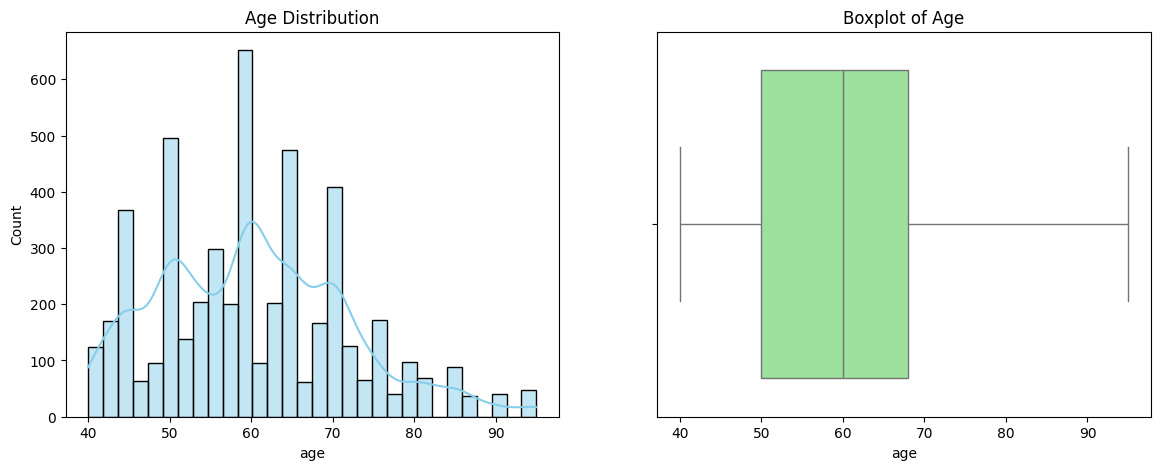

,age
count,5000.000000
mean,60.288736
std,11.697243
min,40.000000
25%,50.000000
50%,60.000000
75%,68.000000
max,95.000000


In [ ]:
# age variable
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["age"],bins=30,kde=True,color="skyblue")
plt.title("Age Distribution") # histplot
plt.subplot(1,2,2)
sns.boxplot(x=df["age"],color="lightgreen")
plt.title("Boxplot of Age")
plt.show()
df["age"].describe()

#### Observations:
Note: Patient age ranges from 40 to 95 years, with a mean of 60.29 and a median of 60, indicating a near-normal distribution. The data is slightly right-skewed due to a few older patients. The IQR (50–68) shows that nearly half the patients are aged 50–70—a high-risk group for heart failure. No outliers are observed.

##### 3. Anaemia

/tmp/ipython-input-26-560505689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="anaemia",data=df,palette="Set2")


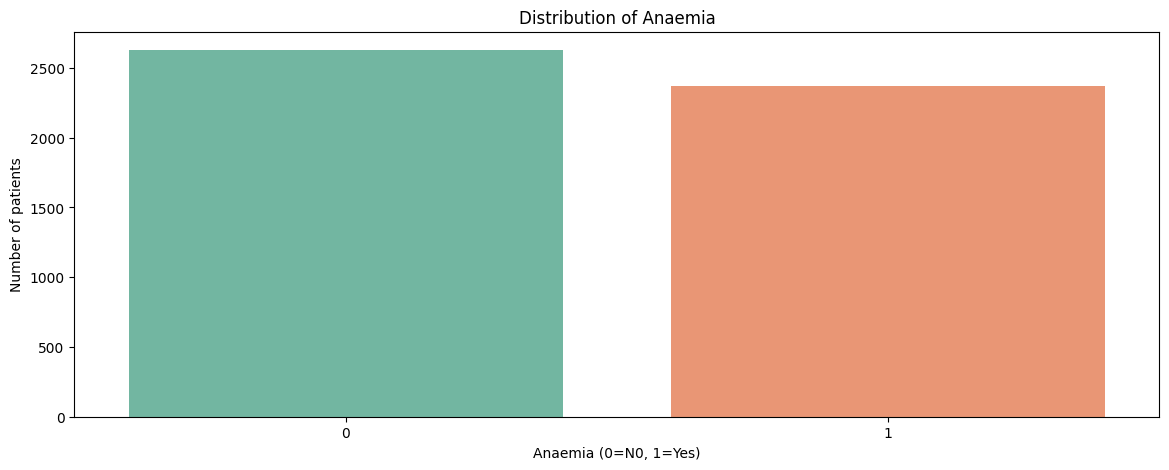

,proportion
anaemia,
0,0.5256
1,0.4744


In [ ]:
# anaemia
plt.figure(figsize=(14,5))
sns.countplot(x="anaemia",data=df,palette="Set2")
plt.title("Distribution of Anaemia")
plt.xlabel("Anaemia (0=N0, 1=Yes)")
plt.ylabel("Number of patients")
plt.show()
df["anaemia"].value_counts(normalize=True)

#### Observations:
Around 47.44% of the heart failure patients had anaemia, while 52.56% did not. The classes are nearly balanced, so we kept this variable unchanged. Since anaemia is a medically important factor in heart function, we will examine its effect on survival during bivariate and model analysis.

##### 4. Creatinine Phosphokinase

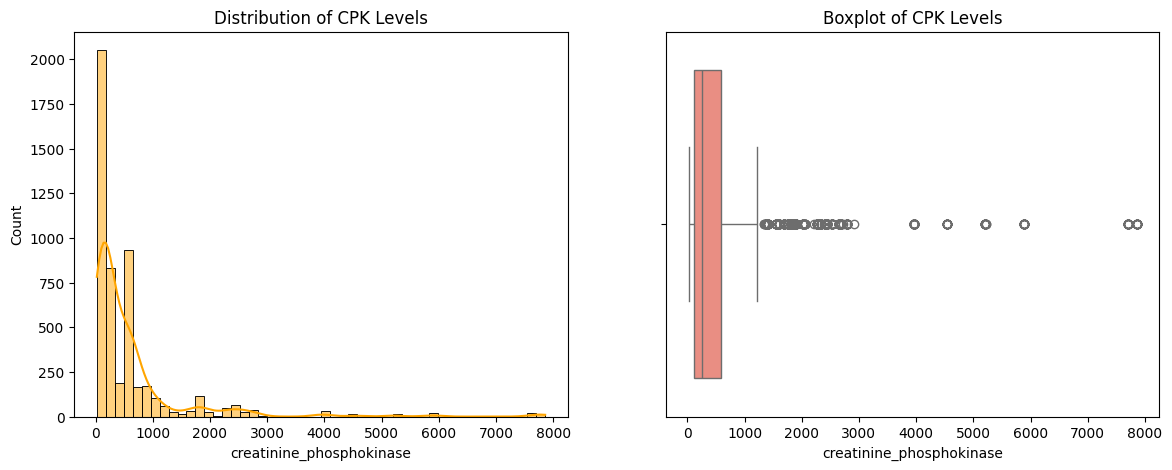

,creatinine_phosphokinase
count,5000.000000
mean,586.760600
std,976.733979
min,23.000000
25%,121.000000
50%,248.000000
75%,582.000000
max,7861.000000


In [ ]:
# creatinine_phosphokinase
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["creatinine_phosphokinase"],bins=50,kde=True,color="orange")
plt.title("Distribution of CPK Levels")
plt.subplot(1,2,2)
sns.boxplot(x=df["creatinine_phosphokinase"],color="salmon")
plt.title("Boxplot of CPK Levels")
plt.show()
df["creatinine_phosphokinase"].describe()

#### Observations:
The distribution of creatinine_phosphokinase is highly right-skewed with most values below 1000 U/L. The highest density lies between 0–600 U/L, while the normal range is 200–300 U/L. Extreme outliers like 7861 can distort model learning. Therefore, a log transformation will be applied to normalize the distribution and reduce the influence of outliers.

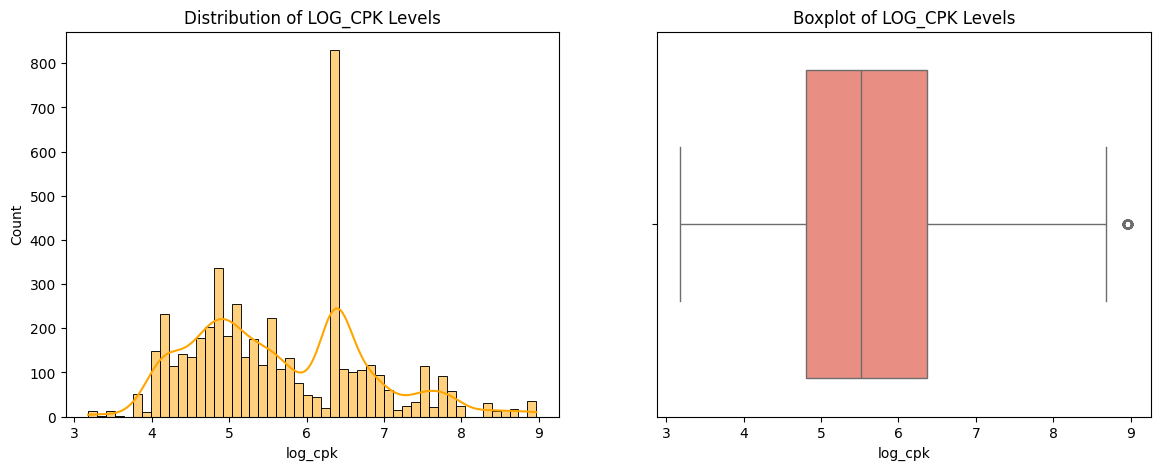

,log_cpk
count,5000.000000
mean,5.672718
std,1.122676
min,3.178054
25%,4.804021
50%,5.517453
75%,6.368187
max,8.969796


In [ ]:
# Log transformation of creatinine_phosphokinase variable
df["log_cpk"]=np.log1p(df["creatinine_phosphokinase"])
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["log_cpk"],bins=50,kde=True,color="orange")
plt.title("Distribution of LOG_CPK Levels")
plt.subplot(1,2,2)
sns.boxplot(x=df["log_cpk"],color="salmon")
plt.title("Boxplot of LOG_CPK Levels")
plt.show()
df["log_cpk"].describe()

#### Observation:
After applying log transformation on the original CPK variable, the distribution became more symmetric and centered around 5 to 6.5. The skewness reduced significantly, with most values falling between 4.5 to 6.5. Outliers in the boxplot also reduced. This makes the variable more suitable for modeling techniques like logistic regression and tree-based models.

##### 5. Diabetes

/tmp/ipython-input-14-591675006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes",data=df,palette="Set2")


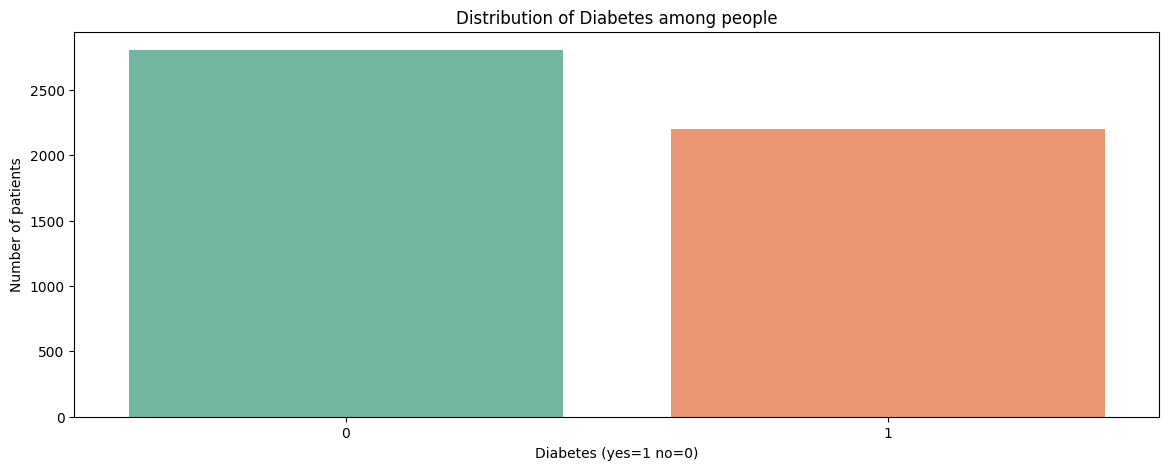

,proportion
diabetes,
0,0.5606
1,0.4394


In [ ]:
# diabetes
plt.figure(figsize=(14,5))
sns.countplot(x="diabetes",data=df,palette="Set2")
plt.title("Distribution of Diabetes among people")
plt.xlabel("Diabetes (yes=1 no=0)")
plt.ylabel("Number of patients")
plt.show()
df["diabetes"].value_counts(normalize=True)


#### Observations:
I analyzed the diabetes variable using a countplot and proportion table. About 44% of the heart failure patients had diabetes, which is medically significant. Since it is a binary categorical variable, I kept it as-is for modeling. The dataset shows mild class imbalance, but it is not critical.

##### 6. Ejection Fraction

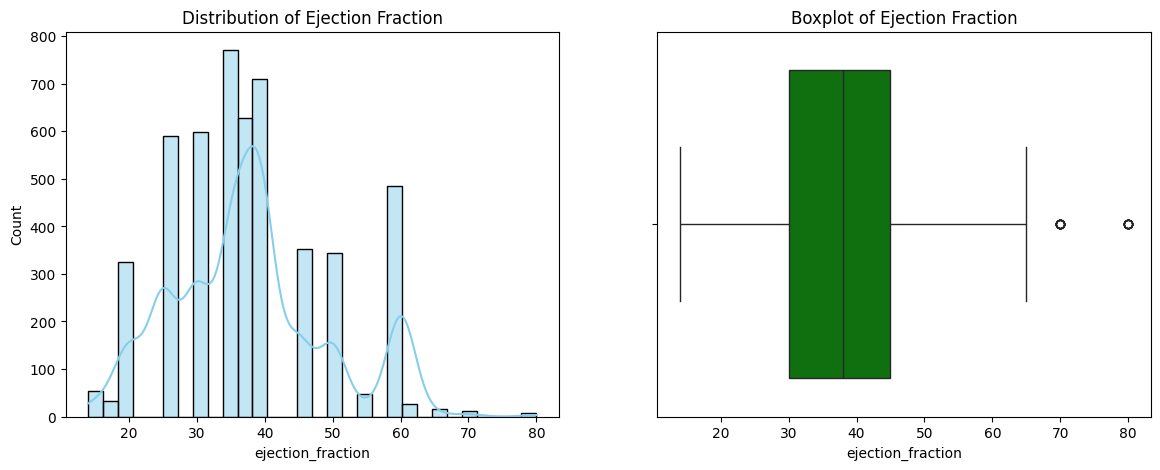

,ejection_fraction
count,5000.000000
mean,37.734600
std,11.514855
min,14.000000
25%,30.000000
50%,38.000000
75%,45.000000
max,80.000000


In [ ]:
# ejection_fraction
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["ejection_fraction"],bins=30,kde=True,color="skyblue")
plt.title("Distribution of Ejection Fraction")
plt.subplot(1,2,2)
sns.boxplot(x="ejection_fraction",color="green",data=df)
plt.title("Boxplot of Ejection Fraction")
plt.show()
df["ejection_fraction"].describe()

#### Observations:
The distribution of ejection fraction is slightly right-skewed. Most values lie between 30–45%, which aligns with typical heart failure conditions. A few outliers like 70% and 80% exist, but they may reflect mild clinical variation, so I retained them. No transformation was applied as the distribution is not heavily skewed.

##### 7. High Blood Pressure

/tmp/ipython-input-16-1995370786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="high_blood_pressure",palette="Set2",data=df)


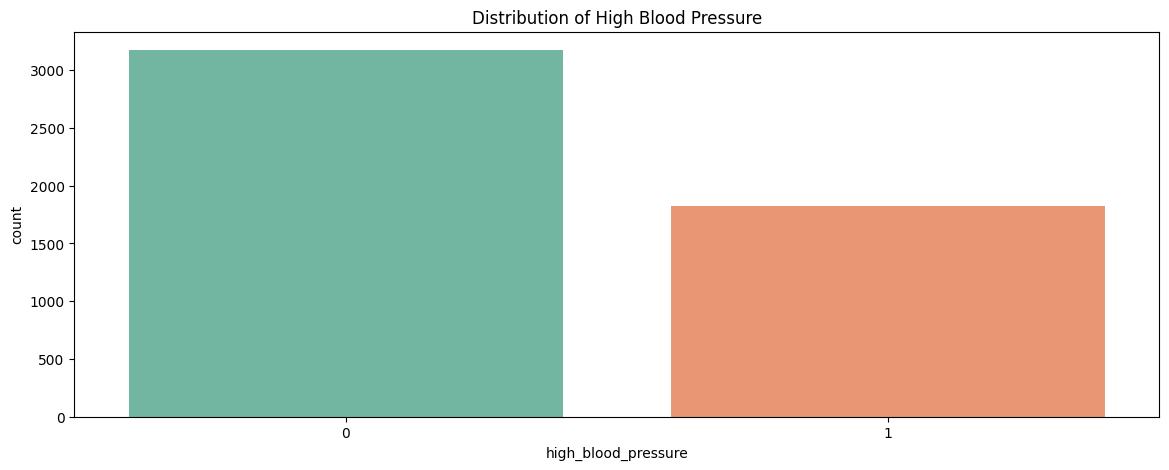

,proportion
high_blood_pressure,
0,0.6352
1,0.3648


In [ ]:
# high_blood_pressure
plt.figure(figsize=(14,5))
sns.countplot(x="high_blood_pressure",palette="Set2",data=df)
plt.title("Distribution of High Blood Pressure")
plt.show()
df["high_blood_pressure"].value_counts(normalize=True)

#### Observations:
Around 63.52% of heart patients did not have high blood pressure, while 36.48% did. This mild imbalance is acceptable for most models. Since over one-third of the patients had high blood pressure, it may be an important contributing factor to heart failure.

##### 8. Platelets

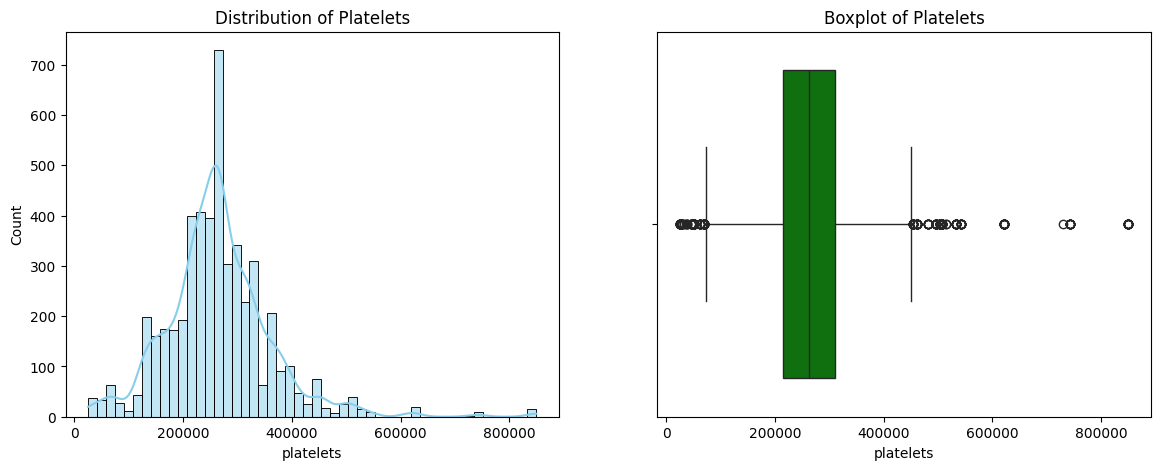

,platelets
count,5000.000000
mean,265075.404370
std,97999.758622
min,25100.000000
25%,215000.000000
50%,263358.030000
75%,310000.000000
max,850000.000000


In [ ]:
# platelets
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["platelets"],bins=50,kde=True,color="skyblue")
plt.title("Distribution of Platelets")
plt.subplot(1,2,2)
sns.boxplot(x=df["platelets"],color="green")
plt.title("Boxplot of Platelets")
plt.show()
df["platelets"].describe()

#### Observations:
The variable platelets shows a moderately right-skewed distribution with most values between 200,000 and 350,000 per µL. Mean is 265,075 and median is 263,350, indicating near symmetry. Some high-end outliers may be due to medical conditions or measurement errors. No transformation is applied to retain medical interpretability and the original scale.

##### 9. Serum Creatinine

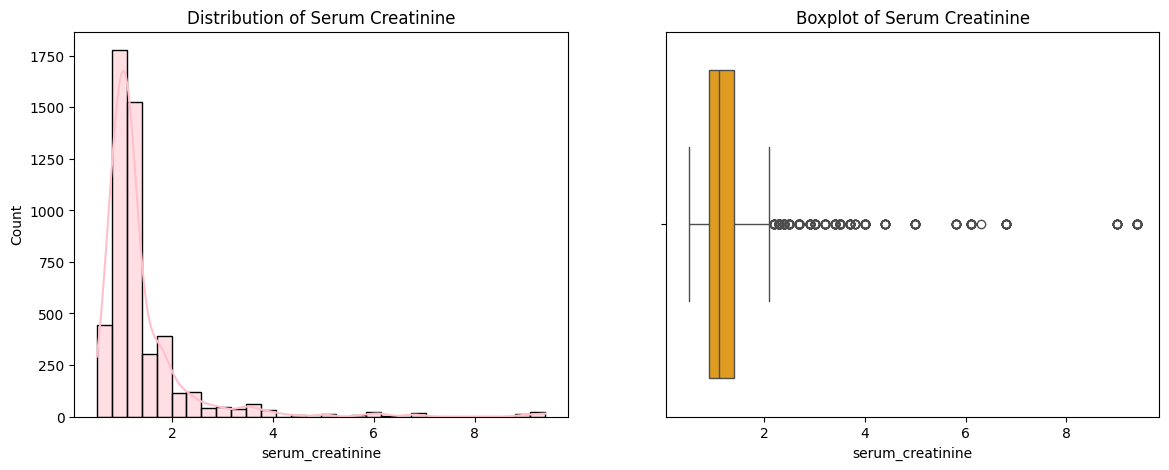

,serum_creatinine
count,5000.000000
mean,1.369106
std,1.009750
min,0.500000
25%,0.900000
50%,1.100000
75%,1.400000
max,9.400000


In [ ]:
# serum_creatinine
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["serum_creatinine"],bins=30,kde=True,color="pink")
plt.title("Distribution of Serum Creatinine")
plt.subplot(1,2,2)
sns.boxplot(x=df["serum_creatinine"],color="orange")
plt.title("Boxplot of Serum Creatinine")
plt.show()
df["serum_creatinine"].describe()

#### Observations:
The distribution of serum_creatinine is highly right-skewed, with most patients having levels between 0.5–1.5 mg/dL. The mean is 1.37 and median is 1.10, indicating strong skewness. The boxplot reveals multiple right-sided outliers, which may represent clinically abnormal cases and should not be removed. Due to the heavy skewness, a log transformation is applied to make the data more suitable for modeling.

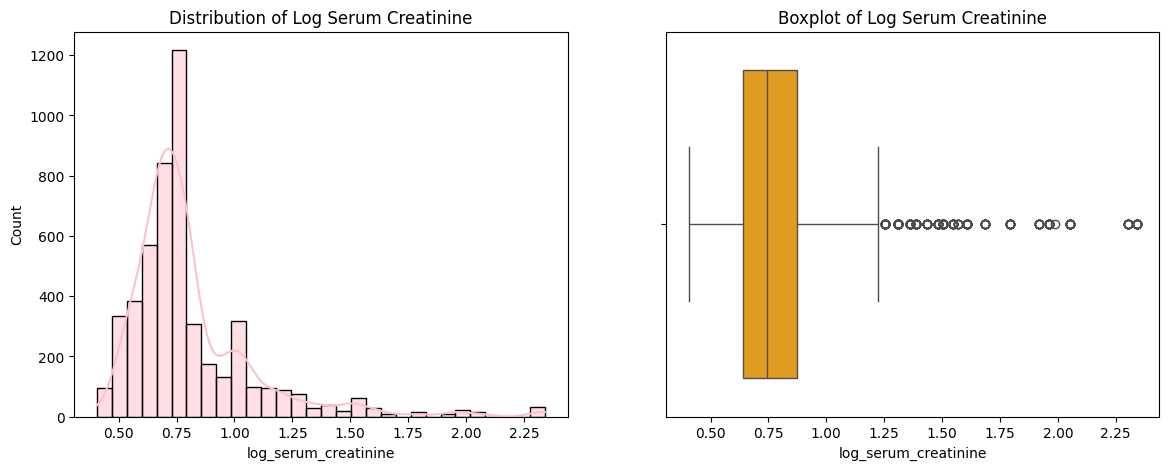

,log_serum_creatinine
count,5000.000000
mean,0.812510
std,0.279505
min,0.405465
25%,0.641854
50%,0.741937
75%,0.875469
max,2.341806


In [ ]:
# log transformation of serum creatinine
df["log_serum_creatinine"]=np.log1p(df["serum_creatinine"])
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["log_serum_creatinine"],bins=30,kde=True,color="pink")
plt.title("Distribution of Log Serum Creatinine")
plt.subplot(1,2,2)
sns.boxplot(x=df["log_serum_creatinine"],color="orange")
plt.title("Boxplot of Log Serum Creatinine")
plt.show()
df["log_serum_creatinine"].describe()

#### Observations:
After applying log transformation our distribution became more symmetric and have lesser outliers. Now our data is enough suitable for model building.

##### 10. Serum Sodium

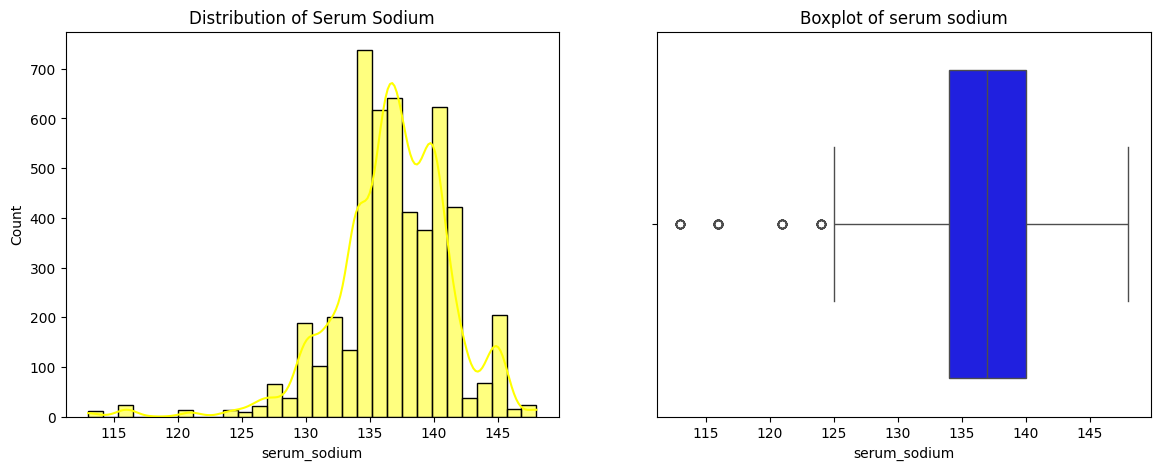

,serum_sodium
count,5000.000000
mean,136.808200
std,4.464236
min,113.000000
25%,134.000000
50%,137.000000
75%,140.000000
max,148.000000


In [ ]:
# serum_sodium
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["serum_sodium"],bins=30,kde=True,color="yellow")
plt.title("Distribution of Serum Sodium")
plt.subplot(1,2,2)
sns.boxplot(x=df["serum_sodium"],color="blue")
plt.title("Boxplot of serum sodium")
plt.show()
df["serum_sodium"].describe()

#### Observations:
The distribution of serum sodium is slightly left-skewed, with most values between 135–145, which is the normal clinical range. The mean is 136.8 and median is 137, indicating near-symmetry. A few mild left-side outliers may have clinical relevance. Since the skewness is minimal, no transformation is needed.

##### 11. Sex

/tmp/ipython-input-22-2608476027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex",data=df,palette="Set2")


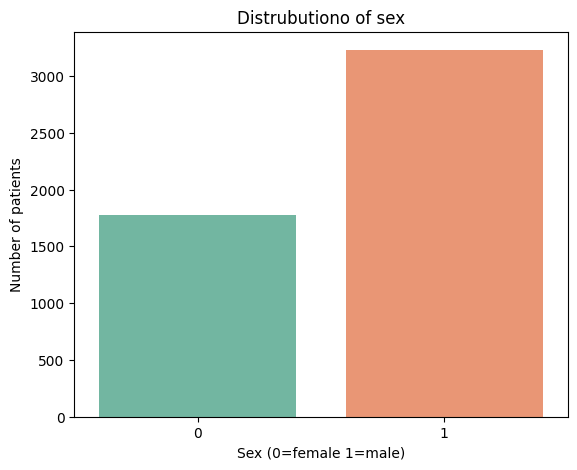

,proportion
sex,
1,0.6456
0,0.3544


In [ ]:
# sex
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x="sex",data=df,palette="Set2")
plt.title("Distrubutiono of sex")
plt.xlabel("Sex (0=female 1=male)")
plt.ylabel("Number of patients")
plt.show()
df["sex"].value_counts(normalize=True)

#### Observations:
In this heart failure dataset, around 64.56% of patients are male and 35.44% are female, showing a clear gender imbalance. Nearly two-thirds of the patients are male, making the dataset male-dominated. This imbalance may influence model behavior, so we will explore its impact during bivariate analysis with the target variable DEATH_EVENT.

12. Smoking

/tmp/ipython-input-23-2641020489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="smoking",data=df,palette="Set2")


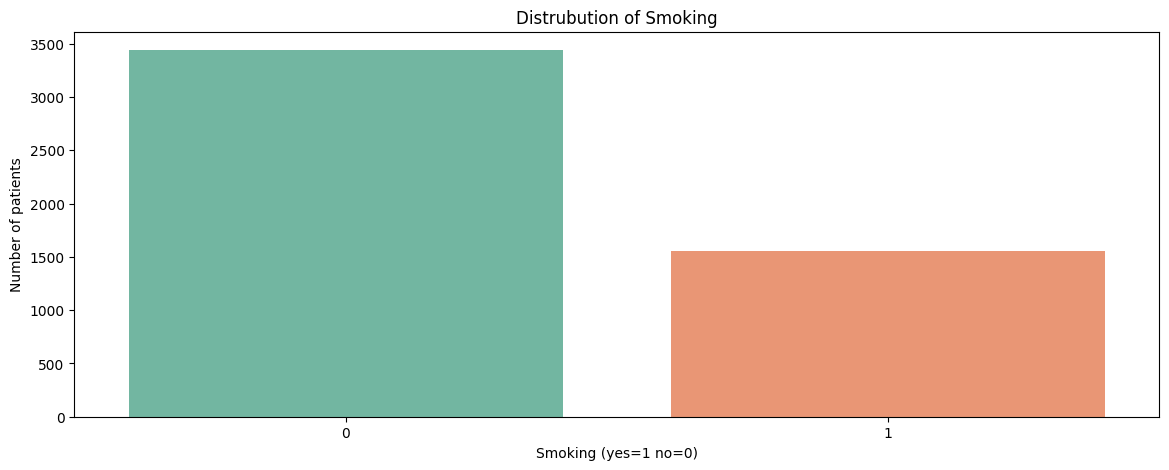

,proportion
smoking,
0,0.6882
1,0.3118


In [ ]:
# smoking
plt.figure(figsize=(14,5))
sns.countplot(x="smoking",data=df,palette="Set2")
plt.xlabel("Smoking (yes=1 no=0)")
plt.ylabel("Number of patients")
plt.title("Distrubution of Smoking")
plt.show()
df["smoking"].value_counts(normalize=True)

#### Observations:
 In the heart failure patients around 68.82% of patients are not smoking and 31.18% are smoking. Our data is mild class imbalence.

##### 13. Time

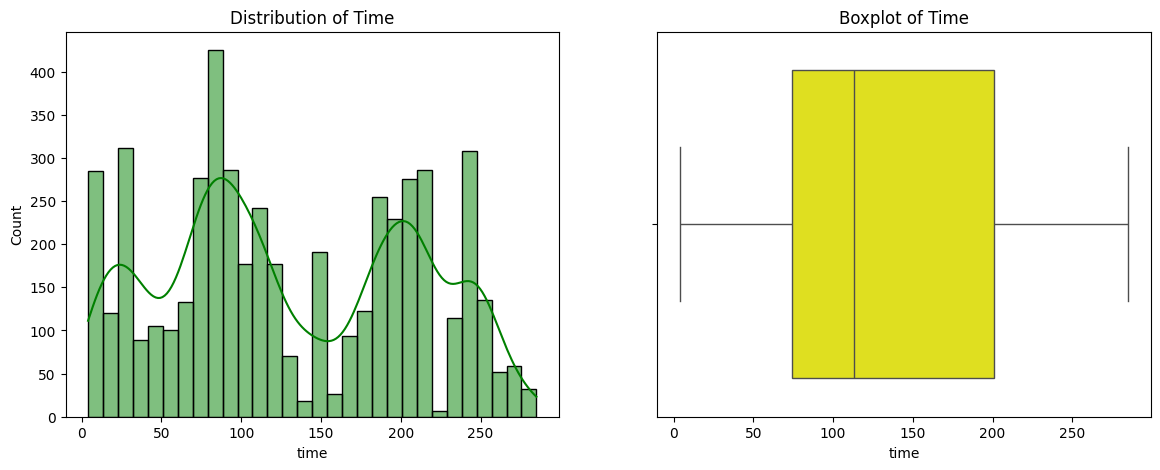

,time
count,5000.000000
mean,130.678800
std,77.325928
min,4.000000
25%,74.000000
50%,113.000000
75%,201.000000
max,285.000000


In [ ]:
# time
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df["time"],bins=30,kde=True,color="green")
plt.title("Distribution of Time")
plt.subplot(1,2,2)
sns.boxplot(x=df["time"],color="yellow")
plt.title("Boxplot of Time")
plt.show()
df["time"].describe()

#### Observations:
patients were followed anywhere between 4 to 285 days. The distribution is roughly symmetric but has local peaks so it is not smooth unimodel. This variable plays a strong role in survival- shorter time is often related to death events. The data has no strong outliers.

#### All plots of univariate analysis at one place:

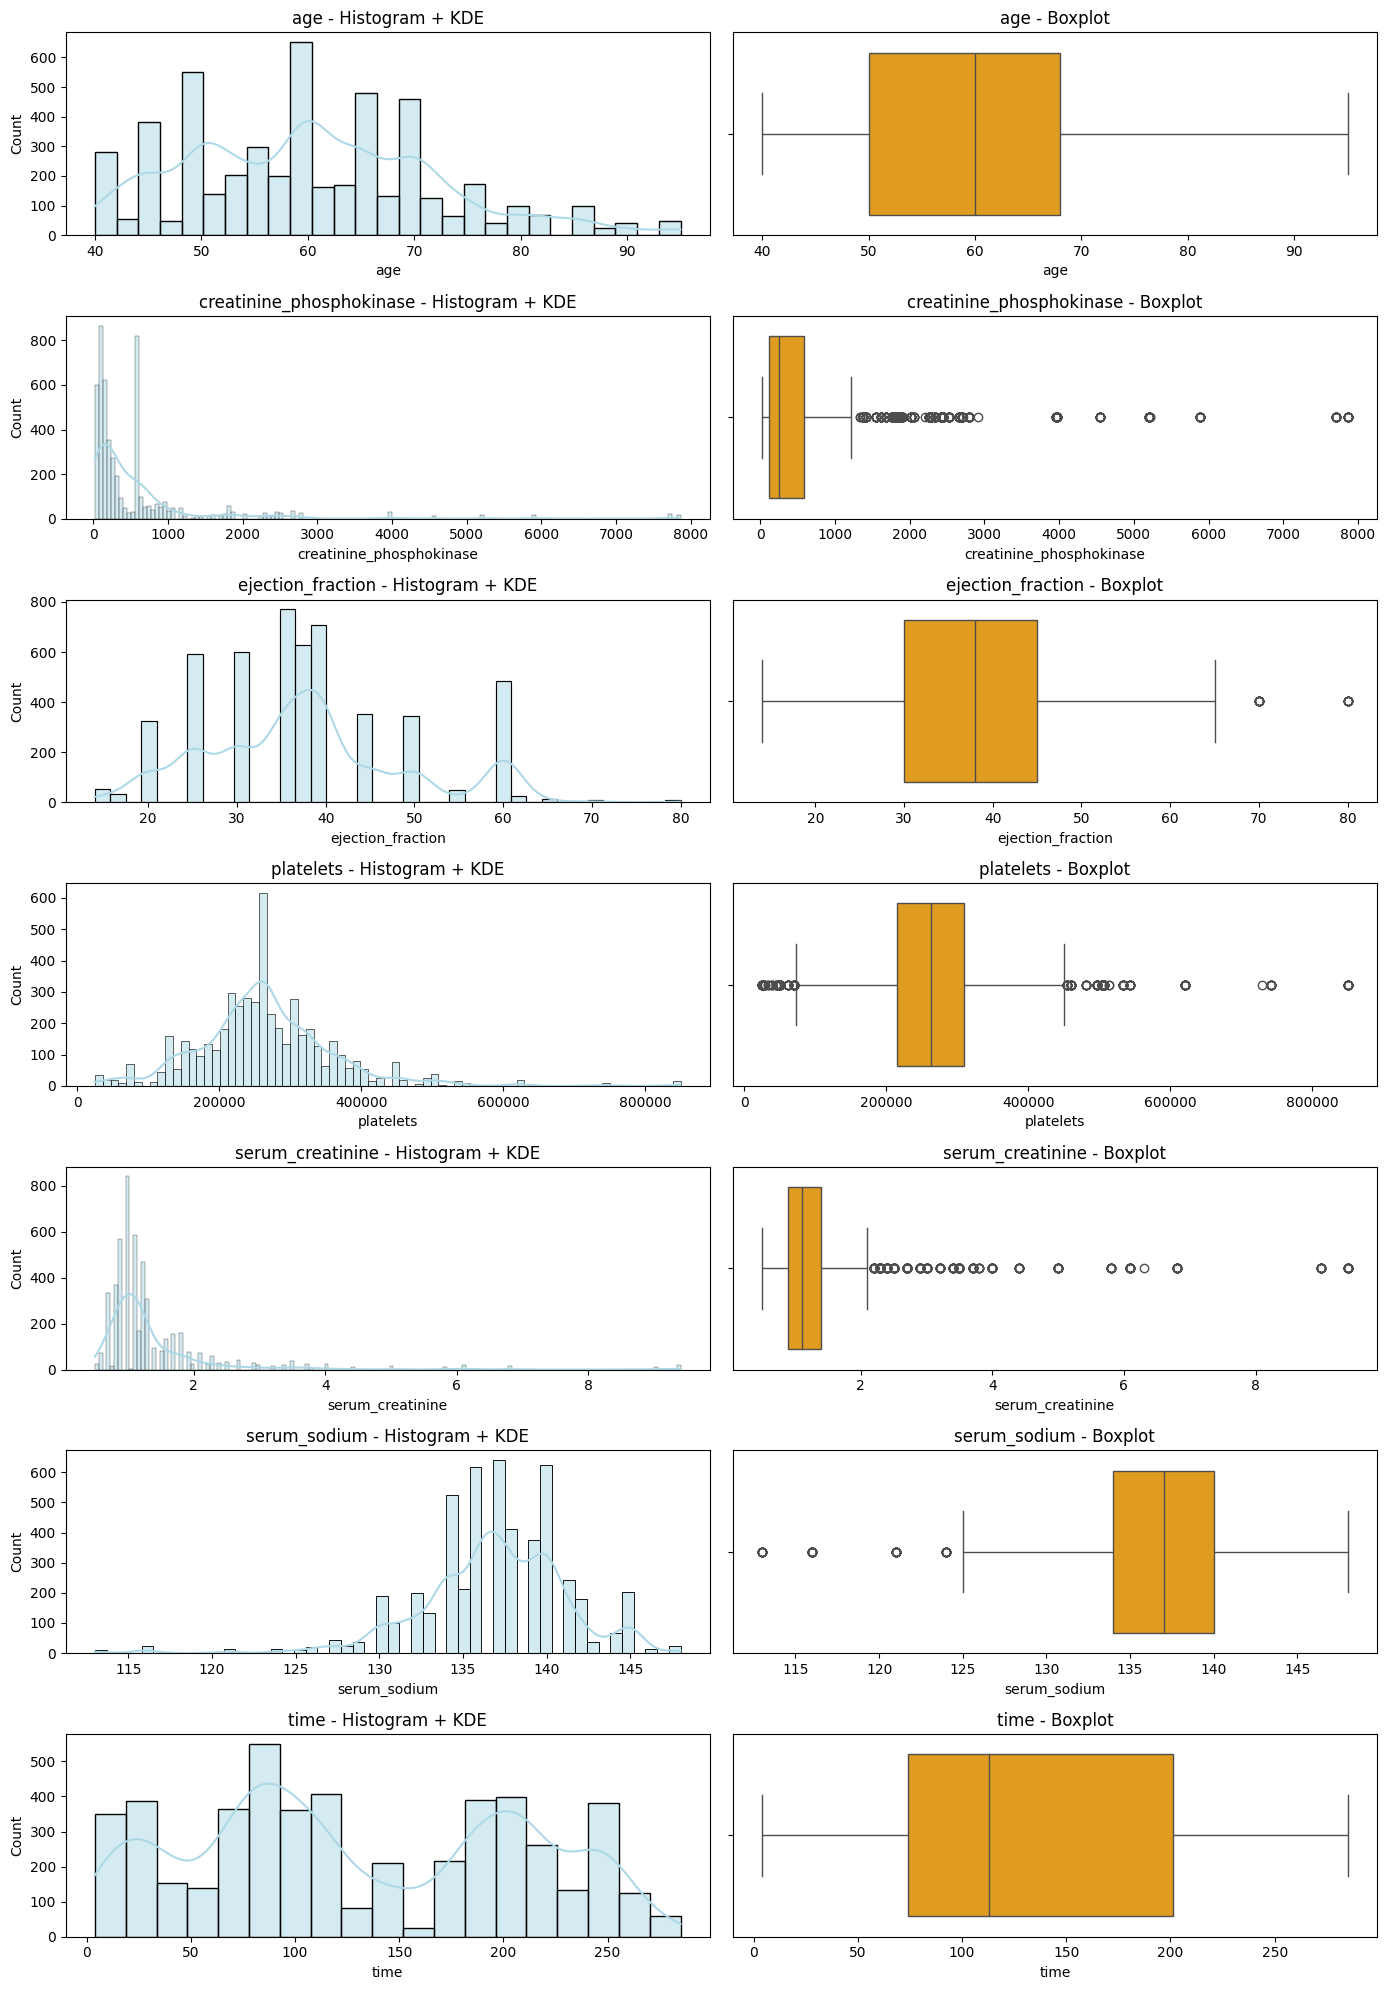

In [ ]:
# For numerical variables
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(14, 20))
plot_number = 1
for col in num_cols:
    plt.subplot(len(num_cols), 2, plot_number)
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'{col} - Histogram + KDE')
    plot_number += 1
    plt.subplot(len(num_cols), 2, plot_number)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col} - Boxplot')
    plot_number += 1
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-3171633406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipython-input-34-3171633406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipython-input-34-3171633406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipython-input-34-3171633406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

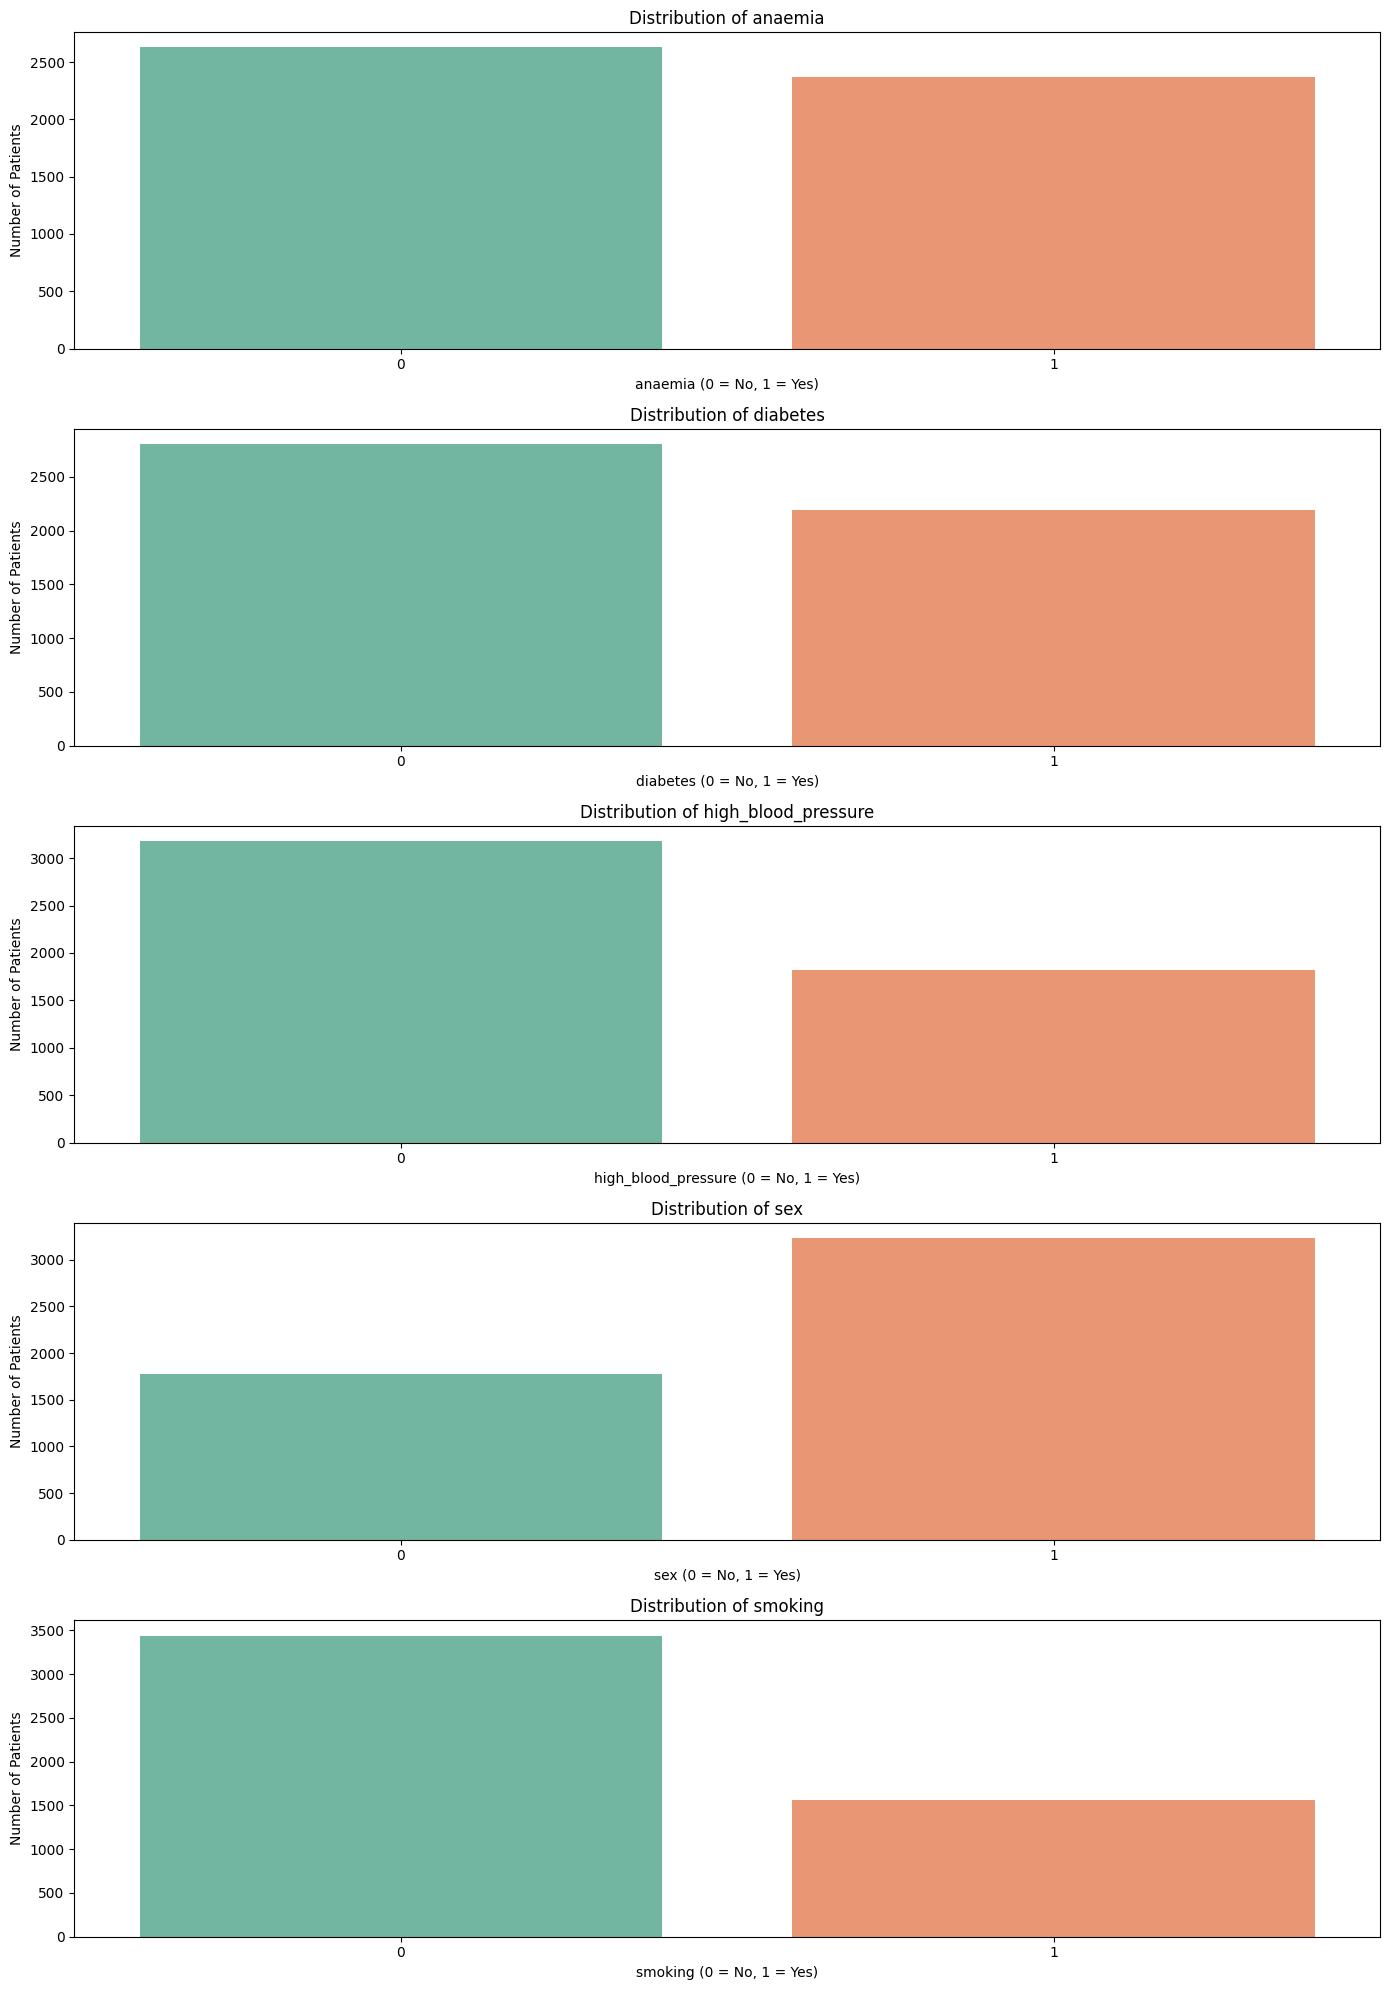

In [ ]:
# For categorical variables
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(14,20 ))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i+1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} (0 = No, 1 = Yes)')
    plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

## Bivariate Analysis

##### 1. Age vs DEATH_EVENT

/tmp/ipython-input-37-1100433865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="age",data=df,palette="Set2")


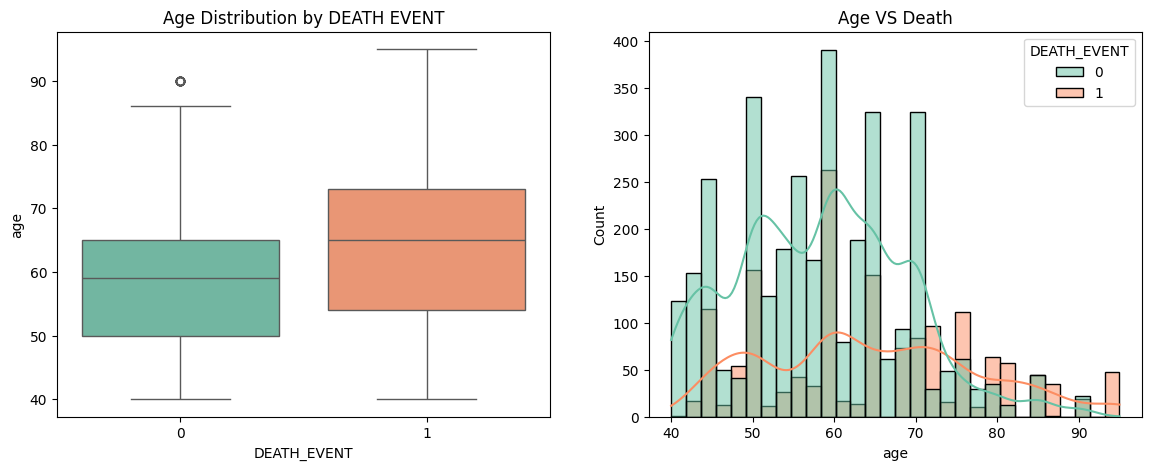

In [ ]:
# age VS DEATH_EVENT
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x="DEATH_EVENT",y="age",data=df,palette="Set2")
plt.title("Age Distribution by DEATH EVENT")
plt.subplot(1,2,2)
sns.histplot(data=df,x="age",bins=30,kde=True,hue="DEATH_EVENT",palette="Set2")
plt.title("Age VS Death")
plt.show()

#### Observations:
The median age is slightly higher in the death group. Survivors peak around ages 55–65, while deaths are more spread out across ages. Although middle-aged patients show better survival rates, deaths occur across all age groups. This indicates that while age influences survival, it is not the sole factor—other medical conditions may also play a significant role.

##### 2. Anaemina vs DEATH_EVENT

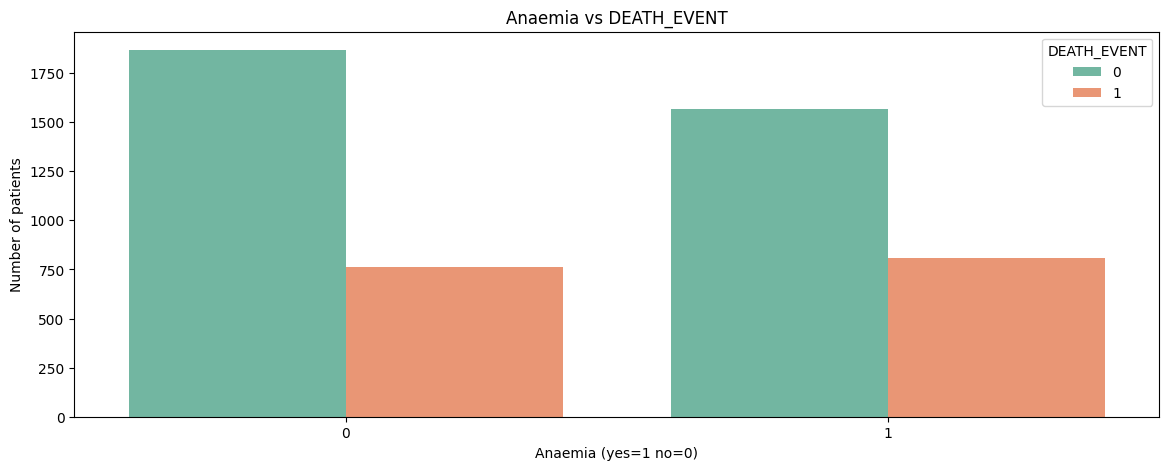

DEATH_EVENT          0          1
anaemia                          
0            71.042618  28.957382
1            65.978078  34.021922


In [ ]:
# anaemia VS DEATH_EVENT
plt.figure(figsize=(14,5))
sns.countplot(x="anaemia",hue="DEATH_EVENT",data=df,palette="Set2")
plt.title("Anaemia vs DEATH_EVENT")
plt.xlabel("Anaemia (yes=1 no=0)")
plt.ylabel("Number of patients")
plt.legend(title="DEATH_EVENT")
plt.show()
anaemia_death=pd.crosstab(df["anaemia"],df["DEATH_EVENT"],normalize="index")*100
print(anaemia_death)

#### Observations:
Patients without anaemia have a higher survival rate (71.04%) than those with anaemia (65.98%). Conversely, death rate is higher in anaemic patients (34.02%) compared to non-anaemic ones (28.96%). This suggests that anaemia may influence survival in heart failure cases. However, the difference is moderate, indicating that other medical factors may also contribute to patient outcomes.

##### 3. Creatinine phosphokinase vs DEATH_EVENT

/tmp/ipython-input-39-3448214232.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="creatinine_phosphokinase",data=df,palette="Set2")


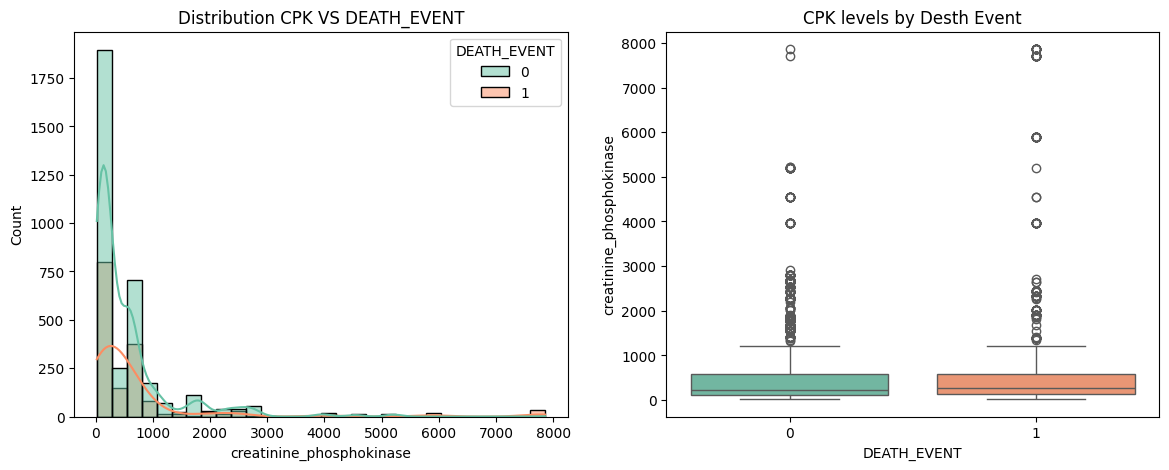

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,3432.0,534.144231,750.748108,25.0,114.5,231.0,582.0,7861.0
1,1568.0,701.926020,1337.926662,23.0,129.0,280.0,582.0,7861.0


In [ ]:
# creatinine_phosphokinase
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x="creatinine_phosphokinase",hue="DEATH_EVENT",bins=30,kde=True,palette="Set2")
plt.title("Distribution CPK VS DEATH_EVENT")
plt.subplot(1,2,2)
sns.boxplot(x="DEATH_EVENT",y="creatinine_phosphokinase",data=df,palette="Set2")
plt.title("CPK levels by Desth Event")
plt.show()
df.groupby("DEATH_EVENT")["creatinine_phosphokinase"].describe()

#### Observations:
The average CPK level in deceased patients (701.9) is higher than in survivors (534.1), suggesting a potential link between elevated CPK and death. Although both groups exceed the normal CPK range, the levels are notably higher in those who died. The median is also greater in the death group (280 vs. 231), and their standard deviation is nearly double, indicating more variability and extreme outliers.

##### 4. Serum creatinine vs DEATH_EVENT

/tmp/ipython-input-40-1922000714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="serum_creatinine",data=df,palette="Set2")


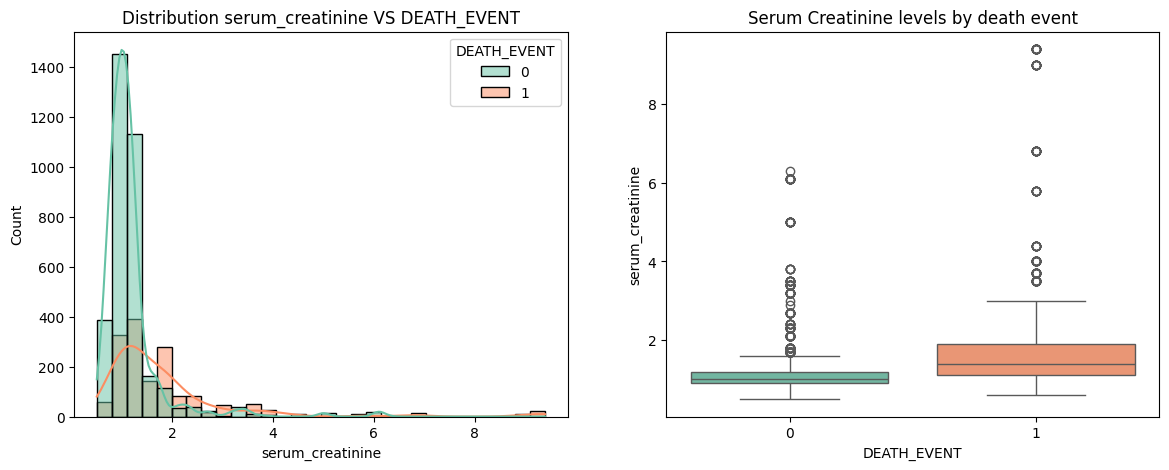

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,3432.0,1.156672,0.632067,0.5,0.9,1.0,1.2,6.3
1,1568.0,1.834075,1.436236,0.6,1.1,1.4,1.9,9.4


In [ ]:
# serum_creatinine VS DEATH EVENT
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x="serum_creatinine",hue="DEATH_EVENT",bins=30,kde=True,palette="Set2")
plt.title("Distribution serum_creatinine VS DEATH_EVENT")
plt.subplot(1,2,2)
sns.boxplot(x="DEATH_EVENT",y="serum_creatinine",data=df,palette="Set2")
plt.title("Serum Creatinine levels by death event")
plt.show()
df.groupby("DEATH_EVENT")["serum_creatinine"].describe()

#### Observations:
The average serum creatinine level is higher in deceased patients (1.83) than in survivors (1.15). While the average level in survivors falls within the normal range, it exceeds the range in those who died, suggesting a strong link with mortality. The median is also higher (1.4 vs. 1.0), and the standard deviation nearly doubles, indicating greater variability and more extreme values in the death group.

##### 5. Serum sodium vs DEATH_EVENT

/tmp/ipython-input-41-316141847.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="serum_sodium",data=df,palette="Set2")


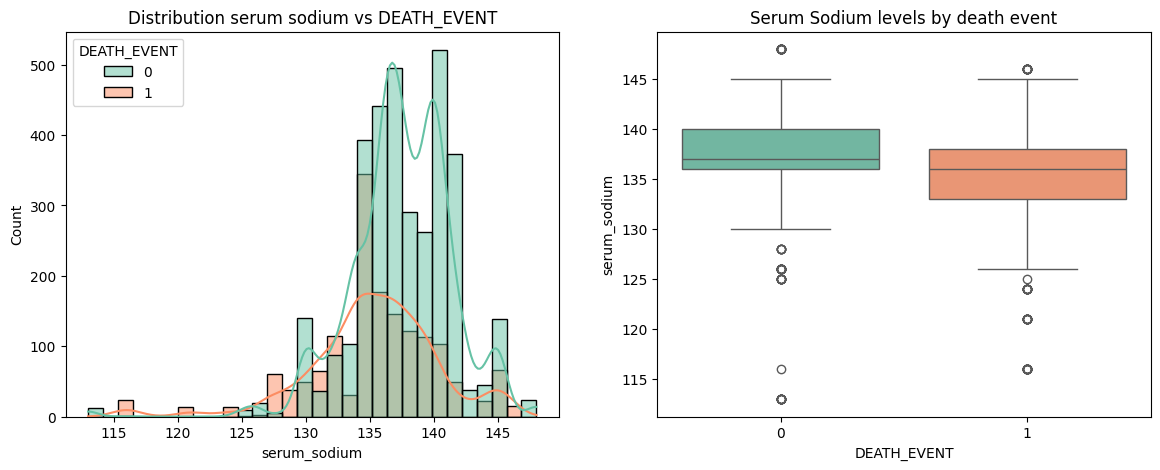

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,3432.0,137.494172,3.983055,113.0,136.0,137.0,140.0,148.0
1,1568.0,135.306760,5.055244,116.0,133.0,136.0,138.0,146.0


In [ ]:
# serum_sodium vs DEATH_EVENT
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x="serum_sodium",hue="DEATH_EVENT",bins=30,kde=True,palette="Set2")
plt.title("Distribution serum sodium vs DEATH_EVENT")
plt.subplot(1,2,2)
sns.boxplot(x="DEATH_EVENT",y="serum_sodium",data=df,palette="Set2")
plt.title("Serum Sodium levels by death event")
plt.show()
df.groupby("DEATH_EVENT")["serum_sodium"].describe()

#### Observations:
Normal serum sodium range is 135–145 mEq/L. Deceased patients had a lower average (135.31) and median (136) serum sodium than survivors. While the difference is not large, about 50% of the deceased had levels below the lower normal limit, whereas 75% of survivors were above it. This suggests that low serum sodium may be a contributing factor to higher mortality in heart failure patients.

##### 6. Diabetes vs DEATH_EVENT

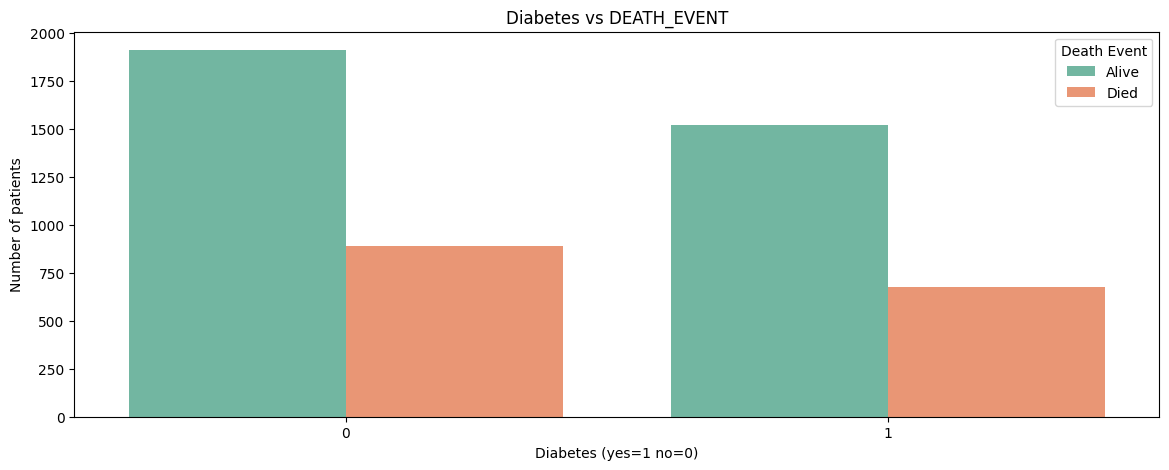

DEATH_EVENT,0,1
diabetes,,
0,68.18,31.82
1,69.23,30.77


In [ ]:
# diabetes VS DEATH_EVENT
plt.figure(figsize=(14,5))
sns.countplot(x="diabetes",hue="DEATH_EVENT",data=df,palette="Set2")
plt.title("Diabetes vs DEATH_EVENT")
plt.xlabel("Diabetes (yes=1 no=0)")
plt.ylabel("Number of patients")
plt.legend(title="Death Event",labels=["Alive","Died"])
plt.show()
(pd.crosstab(df["diabetes"],df["DEATH_EVENT"],normalize="index")*100).round(2)

#### Observations:
Among non-diabetic patients, 31.82% died and 68.18% survived. Among diabetic patients, 30.77% died and 69.23% survived. Surprisingly, the death rate is slightly lower in diabetic patients, which contradicts general medical expectations. However, the difference is minimal and may not be statistically significant. Therefore, in this dataset, diabetes does not appear to be a strong predictor of death in heart failure patients.

##### 7. Ejection fraction vs DEATH_EVENT

/tmp/ipython-input-43-2449238031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="ejection_fraction",data=df,palette="Set2")


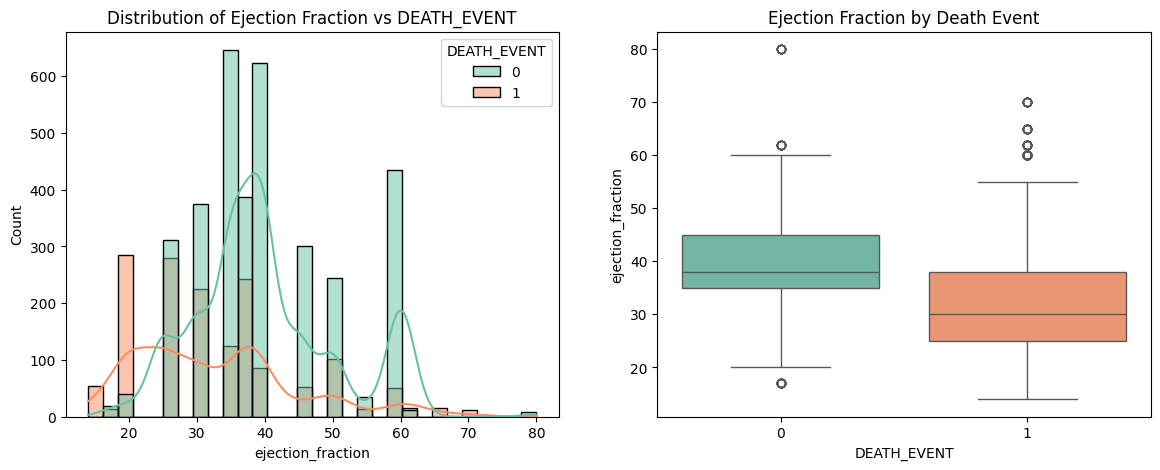

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,3432.0,40.012529,10.558831,17.0,35.0,38.0,45.0,80.0
1,1568.0,32.748724,11.943309,14.0,25.0,30.0,38.0,70.0


In [ ]:
# ejection_fraction vs DEATH_EVENT
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x="ejection_fraction",hue="DEATH_EVENT",bins=30,kde=True,palette="Set2")
plt.title("Distribution of Ejection Fraction vs DEATH_EVENT")
plt.subplot(1,2,2)
sns.boxplot(x="DEATH_EVENT",y="ejection_fraction",data=df,palette="Set2")
plt.title("Ejection Fraction by Death Event")
plt.show()
df.groupby("DEATH_EVENT")["ejection_fraction"].describe()

#### Observations:
According to clinical definitions, EF (ejection fraction) below 40% is considered reduced and linked to heart failure risk. In our data, patients with EF between 35–40 have higher survival rates, while death is more common in the range 20-38 but it is very less than the probability of survival. The average and median EF in died patients (32.75 and 30) are lower than in survived patients (40.01 and 38), indicating that lower EF may be associated with death.

##### 8. High Blood Pressure vs DEATH_EVENT

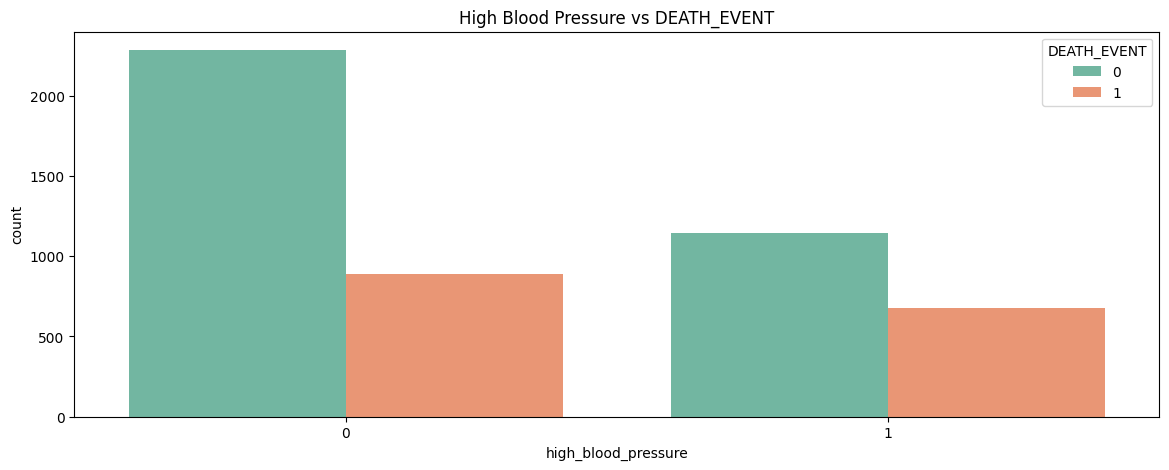

DEATH_EVENT,0,1
high_blood_pressure,,
0,71.95,28.05
1,62.88,37.12


In [ ]:
# high_blood_pressure vs DEATH_EVENT
plt.figure(figsize=(14,5))
sns.countplot(x="high_blood_pressure",hue="DEATH_EVENT",data=df,palette="Set2")
plt.title("High Blood Pressure vs DEATH_EVENT")
plt.show()
(pd.crosstab(df["high_blood_pressure"],df["DEATH_EVENT"],normalize="index")*100).round(2)

#### Observations:
Among patients without high blood pressure, around 28.05% died, whereas 37.12% of patients with high blood pressure died. This indicates a higher death proportion among those with high blood pressure. While the difference isn’t very large, it still suggests that high blood pressure may be linked to a higher risk of death in heart failure patients in this dataset.

##### 9. Platelets vs DEATH_EVENT

/tmp/ipython-input-45-3222457817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="platelets",data=df,palette="Set2")


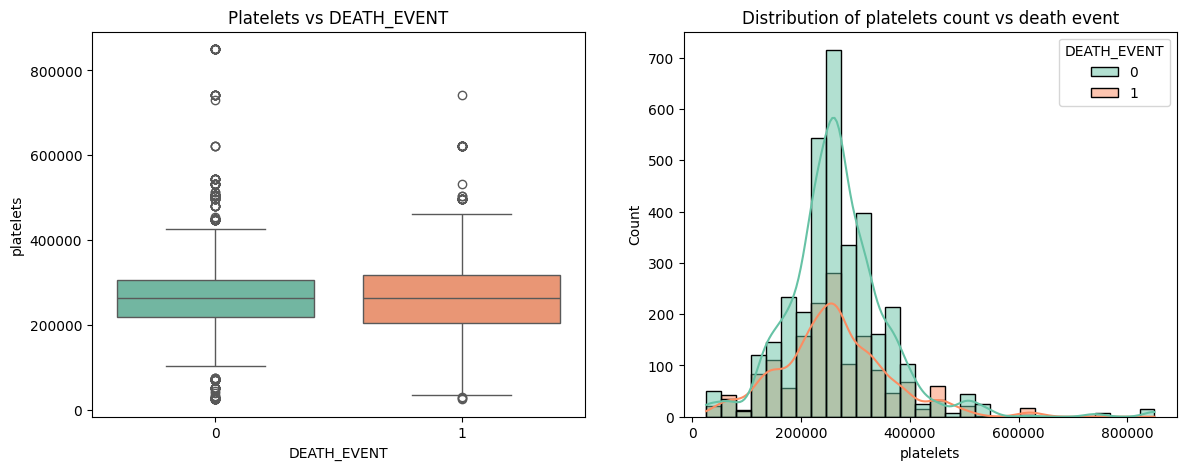

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,3432.0,267163.177028,96503.667982,25100.0,220000.0,263358.03,305000.0,850000.0
1,1568.0,260505.738705,101078.102673,25100.0,204000.0,263358.03,319000.0,742000.0


In [ ]:
# platelets vs DEATH_EVENT
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x="DEATH_EVENT",y="platelets",data=df,palette="Set2")
plt.title("Platelets vs DEATH_EVENT")
plt.subplot(1,2,2)
sns.histplot(data=df,x="platelets",hue="DEATH_EVENT",bins=30,kde=True,palette="Set2")
plt.title("Distribution of platelets count vs death event")
plt.show()
df.groupby("DEATH_EVENT")["platelets"].describe()

#### Observations:
The median platelet count is similar in both groups, but the average is higher among survivors. The death group shows greater variability and more outliers, especially on the lower end. This suggests that abnormally low platelet counts may be linked to a higher risk of death. The distribution also shows higher survival probability in the 2–3 lakh range and higher death probability with low platelet counts.

##### 10. Sex vs DEATH_EVENT

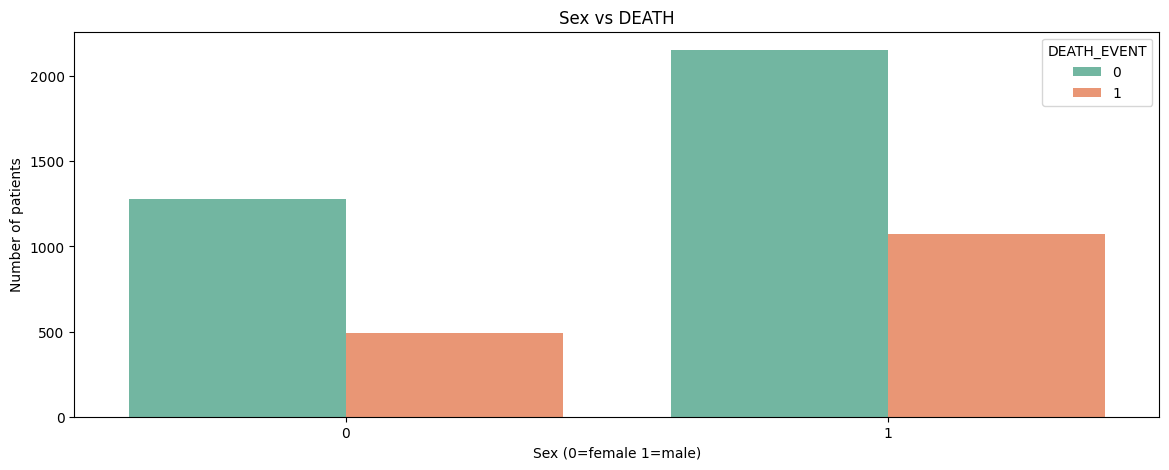

DEATH_EVENT,0,1
sex,,
0,72.121896,27.878104
1,66.728625,33.271375


In [ ]:
# sex vs DEATH_EVENT
plt.figure(figsize=(14,5))
sns.countplot(x="sex",hue="DEATH_EVENT",data=df,palette="Set2")
plt.title("Sex vs DEATH")
plt.xlabel("Sex (0=female 1=male)")
plt.ylabel("Number of patients")
plt.show()
pd.crosstab(df["sex"],df["DEATH_EVENT"],normalize="index")*100

#### Observations:
Among female patients, 27.88% died and 72.12% survived, whereas among male patients, 33.27% died and 66.73% survived. The death rate is slightly higher in males than in females. Although the difference is not very large, it suggests that sex may act as a weak influencing factor in predicting the likelihood of death among heart failure patients.

##### 11. Smoking vs DEATH_EVENT

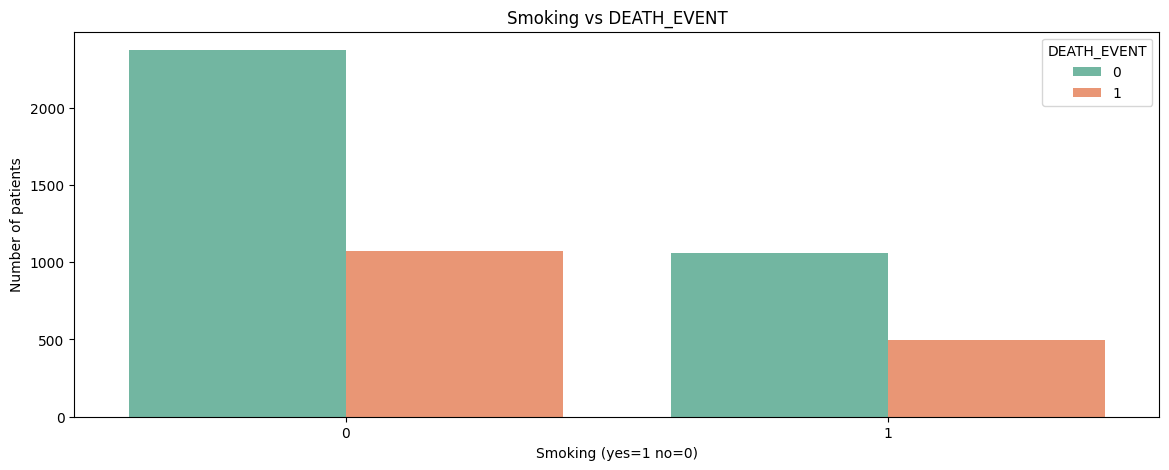

DEATH_EVENT,0,1
smoking,,
0,68.933450,31.066550
1,67.992303,32.007697


In [ ]:
# smoking vs DEATH_EVENT
plt.figure(figsize=(14,5))
sns.countplot(x="smoking",hue="DEATH_EVENT",data=df,palette="Set2")
plt.title("Smoking vs DEATH_EVENT")
plt.xlabel("Smoking (yes=1 no=0)")
plt.ylabel("Number of patients")
plt.show()
pd.crosstab(df["smoking"],df["DEATH_EVENT"],normalize="index")*100

#### Observations:
Among patients who smoke, 68.93% survived and 31.07% died. Among non-smokers, 67.99% survived and 32.01% died. The difference in death rate is very small, but smokers have a slightly lower death rate in this dataset. Although counterintuitive, the difference is minor and may not be statistically significant. Hence, smoking might not be a strong influencing factor in death.

##### 12. Time vs DEATH_EVENT

/tmp/ipython-input-48-300173887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT",y="time",data=df,palette="Set2")


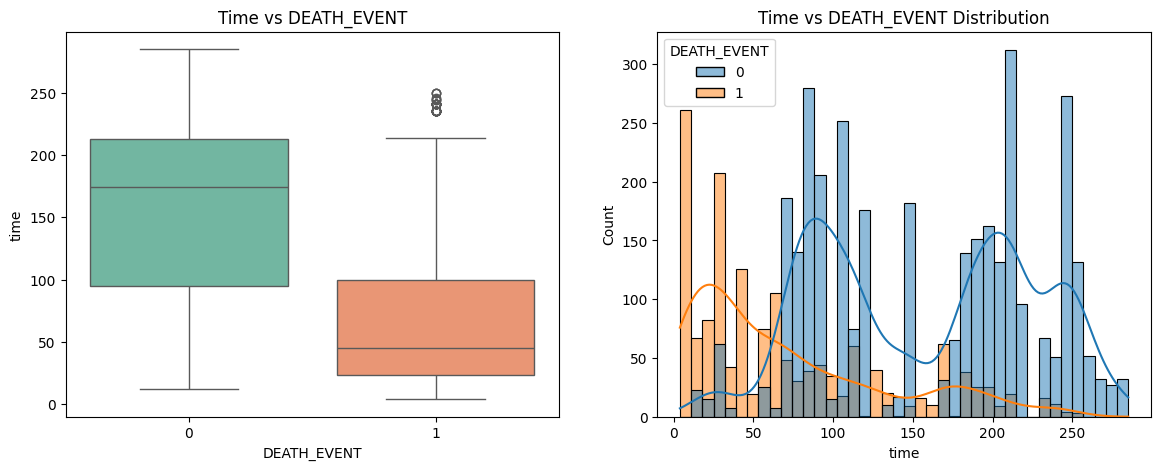

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,3432.0,158.232809,67.418180,12.0,95.00,174.0,213.0,285.0
1,1568.0,70.369260,61.811875,4.0,23.75,45.0,100.0,250.0


In [ ]:
# time vs DEATH_EVENT
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x="DEATH_EVENT",y="time",data=df,palette="Set2")
plt.title("Time vs DEATH_EVENT")
plt.subplot(1,2,2)
sns.histplot(x="time",data=df,bins=40,kde=True,color="skyblue",hue="DEATH_EVENT")
plt.title("Time vs DEATH_EVENT Distribution")
plt.show()
df.groupby("DEATH_EVENT")["time"].describe()

#### Observations:
The median time for died patients (45 days) is much lower than for survived ones (174 days), suggesting shorter follow-up is linked to higher death. Histogram and KDE show most deaths occurred early, while survivors had longer time spans. About 75% of deaths happened within 100 days, while 75% of survivors lived beyond 95 days. Hence, lower time duration is strongly associated with higher death risk.

### All plots of bivariate anlysis at one place

/tmp/ipython-input-49-1942105848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
/tmp/ipython-input-49-1942105848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
/tmp/ipython-input-49-1942105848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
/tmp/ipython-input-49-1942105848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

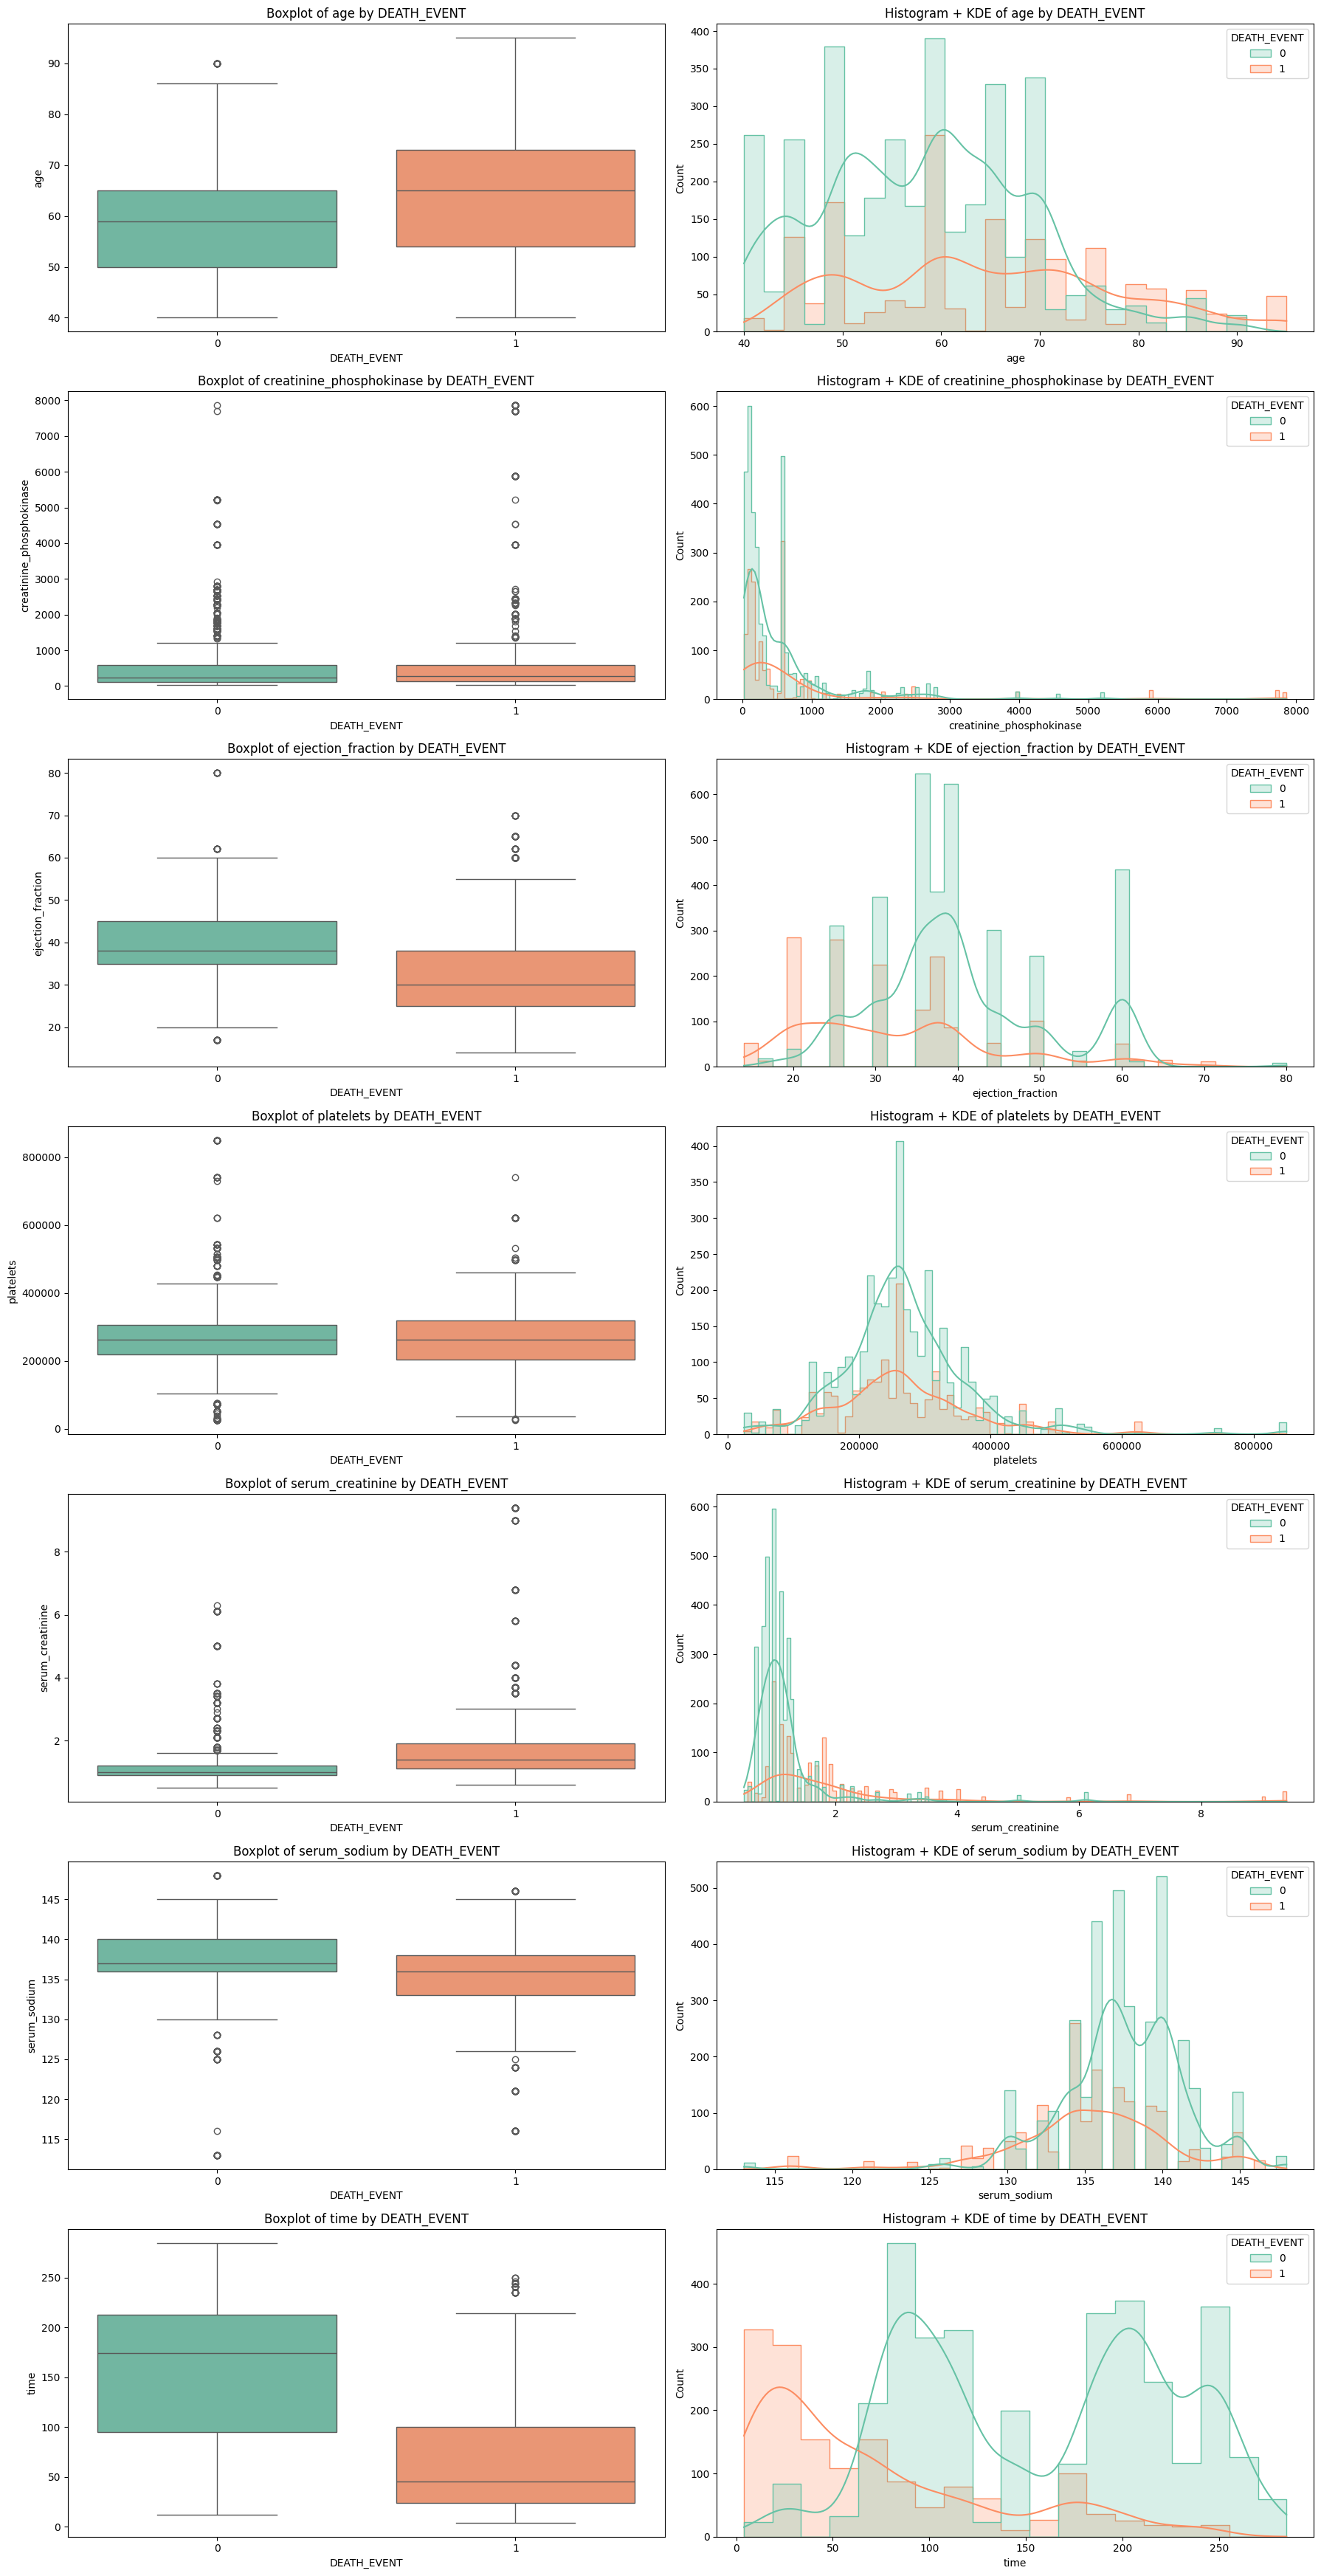

In [ ]:
# For numerical variables
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
            'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(18, len(num_cols) * 5))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, 2*i + 1)
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot of {col} by DEATH_EVENT')
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(col)
    plt.subplot(len(num_cols), 2, 2*i + 2)
    sns.histplot(data=df, x=col, hue='DEATH_EVENT', kde=True, element='step', palette='Set2')
    plt.title(f'Histogram + KDE of {col} by DEATH_EVENT')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

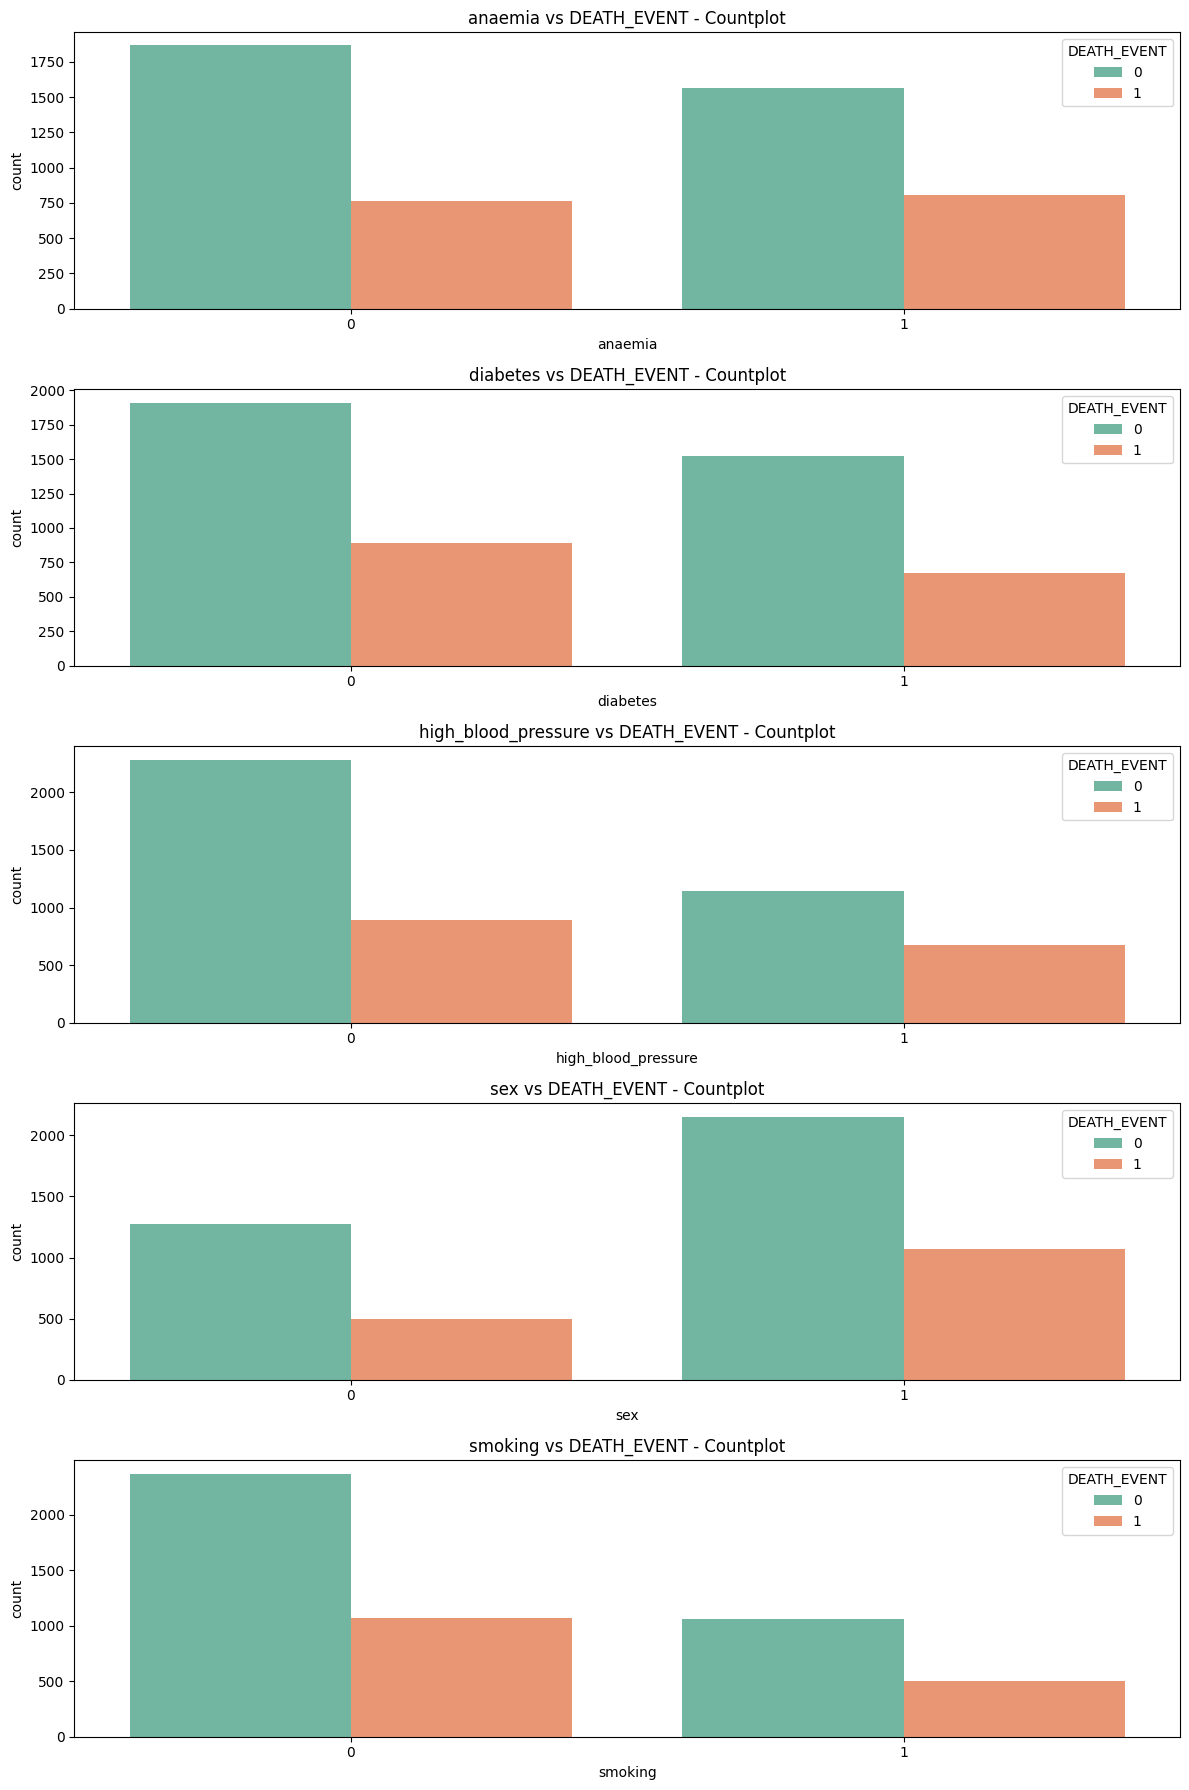

In [ ]:
# For categorical variables
# Categorical columns
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(12, 18))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 1, i + 1)
    sns.countplot(data=df, x=col, hue='DEATH_EVENT', palette='Set2')
    plt.title(f'{col} vs DEATH_EVENT - Countplot')
plt.tight_layout()
plt.show()

## Testing:
To validate the patterns observed in bivariate analysis, I performed appropriate statistical tests to check if the differences are statistically significant or occurred by chance. For categorical variables, I used the Chi-Square test of independence. For numerical variables, I used the Mann-Whitney U test because the data is not normally distributed and contains many outliers, making it more suitable than parametric tests like the t-test

#### 1. Age vs DEATH_EVENT
##### Hypothesis:
##### H0 = Distribution of age same in both the groups(died and alive).
##### H1 = Distribution of age is not same in both the groups (died and alive).

In [ ]:
from scipy.stats import mannwhitneyu
age_alive=df[df["DEATH_EVENT"]==0]["age"]
age_died=df[df["DEATH_EVENT"]==1]["age"]
stat,p_value=mannwhitneyu(age_alive,age_died,alternative="two-sided")
print("Mann-Whitney U Test: ")
print(f"U statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann-Whitney U Test: 
U statistic = 1973276.0000
p-value = 0.0000


##### Conclusion:
Since p-value = 0.0000 < 0.05, we reject H₀. Older patients had higher death risk, confirming age is a significant factor in death events.

#### 2. Anaemia vs DEATH_EVENT
##### Hypothesis:
##### H0 : Anaemia and DEATH_EVENT are independent.
###### H1 : Anaemia and DEATH_EVENT are not independent.`


In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df["anaemia"],df["DEATH_EVENT"])
chi2_stat, p_value,dof, expected = chi2_contingency(contingency_table)
print("contingencey table: ")
print(contingency_table)
print(f"Chi-square Test of independence: ")
print(f"Chi-square statistic = {chi2_stat:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p_value:.4f}")

contingencey table: 
DEATH_EVENT     0    1
anaemia               
0            1867  761
1            1565  807
Chi-square Test of independence: 
Chi-square statistic = 14.6215
Degrees of freedom = 1
p-value = 0.0001


##### Conclusion:
##### Since p-value = 0.0001 < 0.05, we reject H₀. Anaemic patients show a higher death rate, confirming anaemia as a significant factor influencing survival.

#### 3. Creatinine phosphokinase vs DEATH_EVENT
##### Hypothesis:
##### H0 : The distribution of creatinine phosphokinase is same in both the groups (died and alive).
##### H1 : The distribution of creatinine phosphokinase is not same in both the groups (died and alive).**bold text**

In [ ]:
from scipy.stats import mannwhitneyu
cpk_alive=df[df["DEATH_EVENT"]==0]["creatinine_phosphokinase"]
cpk_died=df[df["DEATH_EVENT"]== 1]["creatinine_phosphokinase"]
stat, p_value = mannwhitneyu(cpk_alive,cpk_died,alternative="two-sided")
print("Mann-Whitney U Test: ")
print(f"U statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann-Whitney U Test: 
U statistic = 2533747.5000
p-value = 0.0009


##### Conclusion:
Since p-value = 0.0009 < 0.05, we reject H₀. CPK levels differ significantly between groups, supporting that high CPK is a risk factor for death.

#### 4. Serum creatinine vs DEATH_EVENT
##### Hypothesis:
##### H0 : Distribution of serum creatinine is same in both the groups (died and alive).
##### H1 : Distribution of serum creatinine is not same in both the groups (died and alive).

In [ ]:
from scipy.stats import mannwhitneyu
sc_alive=df[df["DEATH_EVENT"]==0]["serum_creatinine"]
sc_died=df[df["DEATH_EVENT"]==1]["serum_creatinine"]
stat, p_value = mannwhitneyu(sc_alive,sc_died,alternative="two-sided")
print("Mann-Whitney U Test: ")
print(f"U statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann-Whitney U Test: 
U statistic = 1387597.5000
p-value = 0.0000


##### Conclusion:
Since p-value = 0.0000 < 0.05, we reject the null hypothesis. This confirms that high serum creatinine levels significantly influence death risk, supporting our earlier observations.

#### 5. Serum sodium vs DEATH_EVENT
##### Hypothesis:
##### H0 : Distribution of serum sodium is same in both the groups (died and alive).
##### H1 : Distribution of serum sodium is not same in both the groups (died and alive).


In [ ]:
from scipy.stats import mannwhitneyu
sodium_alive=df[df["DEATH_EVENT"]==0]["serum_sodium"]
sodium_died=df[df["DEATH_EVENT"]==1]["serum_sodium"]
stat,p_value=mannwhitneyu(sodium_alive,sodium_died,alternative="two-sided")
print("Mann Whitney U Test: ")
print(f"U statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann Whitney U Test: 
U statistic = 3481853.0000
p-value = 0.0000


##### Conclusion:
Since p-value = 0.0000 < 0.05, we reject the null. This confirms serum sodium significantly affects death risk, with lower levels linked to higher mortality among patients.

#### 6. Diabetes vs DEATH_EVENT
##### Hypothesis:
##### H0 : diabetes and DEATH_EVENT are independent.
##### H1 : diabetes and DEATH_EVENT are not independent.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df["diabetes"],df["DEATH_EVENT"])
chi2_stat,p_value,dof,expected=chi2_contingency(contingency_table)
print("contingency table: ")
print(contingency_table)
print("Chi-square Test of independence: ")
print(f"Chi-square statistic = {chi2_stat:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p_value:.4f}")

contingency table: 
DEATH_EVENT     0    1
diabetes              
0            1911  892
1            1521  676
Chi-square Test of independence: 
Chi-square statistic = 0.5874
Degrees of freedom = 1
p-value = 0.4434


##### Conclusion:
Since p-value = 0.4434 > 0.05, we fail to reject the null. Diabetes shows no significant association with death, suggesting it may not be a strong risk factor here.

#### 7. Ejection fraction vs DEATH_EVENT
##### Hypothesis:
##### H0 : The distribution of ejection fraction is same in both the groups (died and alive).
##### H1 : Distribution of ejection fraction is not same in both the groups (died and alive).

In [ ]:
from scipy.stats import mannwhitneyu
ef_alive=df[df["DEATH_EVENT"]==0]["ejection_fraction"]
ef_died=df[df["DEATH_EVENT"]==1]["ejection_fraction"]
u_stat,p_value=mannwhitneyu(ef_alive,ef_died,alternative="two-sided")
print("Mann-Whitney U Test: ")
print(f"U statistic = {u_stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann-Whitney U Test: 
U statistic = 3726234.5000
p-value = 0.0000


##### Conclusion:
Since p-value = 0.0000 < 0.05, we reject the null. Low ejection fraction is significantly associated with higher death risk and is an important predictor of mortality in heart failure patients.

#### 8. High Blood Pressure vs DEATH_EVENT
##### Hypothesis:
##### H0 : high_blood_pressure and DEATH_EVENT are independent.
##### H0 : high_blood_pressure and DEATH_EVENT are not independent.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df["high_blood_pressure"],df["DEATH_EVENT"])
chi2_stat, p_value,dof,expected=chi2_contingency(contingency_table)
print("contingency table: ")
print(contingency_table)
print("Chi-square Test of independence: ")
print(f"Chi-square statistic = {chi2_stat:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p_value:.4f}")

contingency table: 
DEATH_EVENT             0    1
high_blood_pressure           
0                    2285  891
1                    1147  677
Chi-square Test of independence: 
Chi-square statistic = 43.7815
Degrees of freedom = 1
p-value = 0.0000


##### Conclusion:
Since p-value = 0.0000 < 0.05, we reject the null. High blood pressure is significantly associated with death risk, making it a contributing factor to patient mortality in this dataset.

#### 9.Platelets vs DEATH_EVENT
##### Hypothesis:
##### H0 : platelets and DEATH_EVENT are independent.
##### H1 : platelets and DEATH_EVENT are not independent.


In [ ]:
from scipy.stats import mannwhitneyu
platelets_alive=df[df["DEATH_EVENT"]==0]["platelets"]
platelets_died=df[df["DEATH_EVENT"]==1]["platelets"]
stat,p_value=mannwhitneyu(platelets_alive,platelets_died,alternative="two-sided")
print("Mann-Whitney U Test: ")
print(f"U statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann-Whitney U Test: 
U statistic = 2801770.0000
p-value = 0.0190


##### Conclusion:
Since p-value = 0.0190 < 0.05, we reject the null. Platelet count is significantly associated with death risk—lower platelet levels are linked to higher mortality in heart failure patients.

#### 10. Sex vs DEATH_EVENT
##### Hypothesis:
##### H0 : sex and DEATH_EVENT are independent.
##### H1 : sex and DEATH_EVENT are not independent.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df["sex"],df["DEATH_EVENT"])
print("Contingency table: ")
print(contingency_table)
chi2_stat,p_value,dof,expected=chi2_contingency(contingency_table)
print("Chi-square Test of independence: ")
print(f"Chi-square statistic = {chi2_stat:.4f}")
print(f"Degrees fo freedom = {dof}")
print(f"p-value = {p_value:.4f}")

Contingency table: 
DEATH_EVENT     0     1
sex                    
0            1278   494
1            2154  1074
Chi-square Test of independence: 
Chi-square statistic = 15.2094
Degrees fo freedom = 1
p-value = 0.0001


##### Conclusion:
Since p-value = 0.0001 < 0.05, we reject the null. Sex and death event are statistically dependent. Males have higher death risk, so sex is an influencing factor.

#### 11. Smoking vs DEATH_EVENT
##### Hypothesis:
##### H0 : smoking and DEATH_EVENT are independent.
##### H1 : smoking and DEATH_EVENT are not independent.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df["smoking"],df["DEATH_EVENT"])
print("Contingency table: ")
print(contingency_table)
chi2_stat,p_value,dof,expected=chi2_contingency(contingency_table)
print("Chi-square Test of independence: ")
print(f"Chi-square statistic = {chi2_stat:.4f}")
print(f"Degress of freedom = {dof}")
print(f"P-value = {p_value:.4f}")

Contingency table: 
DEATH_EVENT     0     1
smoking                
0            2372  1069
1            1060   499
Chi-square Test of independence: 
Chi-square statistic = 0.3989
Degress of freedom = 1
P-value = 0.5277


##### Conclusion:
Since p-value = 0.5277 > 0.05, we fail to reject the null. Smoking and death event are not statistically associated, so smoking is not a significant factor in predicting death here.

#### 12. Time vs DEATH_EVENT
##### Hypothesis:
##### H0 : Distribution of time and DEATH_EVENT are same in both the groups (died and alive).
##### H1 : Distribution of time and DEATH_EVENT are not same in both the groups (died and alive).

In [ ]:
from scipy.stats import mannwhitneyu
time_alive=df[df["DEATH_EVENT"]==0]["time"]
time_died=df[df["DEATH_EVENT"]==1]["time"]
stat,p_value=mannwhitneyu(time_alive,time_died,alternative="two-sided")
print("Mann-Whitney U Test: ")
print(f"U statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

Mann-Whitney U Test: 
U statistic = 4510975.0000
p-value = 0.0000


##### Conclusion:
Since p-value = 0.0000 < 0.05, we reject the null. Follow-up time significantly differs between survived and died groups, making it an important factor in predicting patient outcomes.

## Multivariate Analysis
In bivariate analysis, we studied variables individually. But real outcomes depend on multiple factors together. So, in multivariate analysis, we’ll examine variable interactions, detect multicollinearity, and identify the most important predictors for modeling.

##### Checking multicolinearity for numeric variables

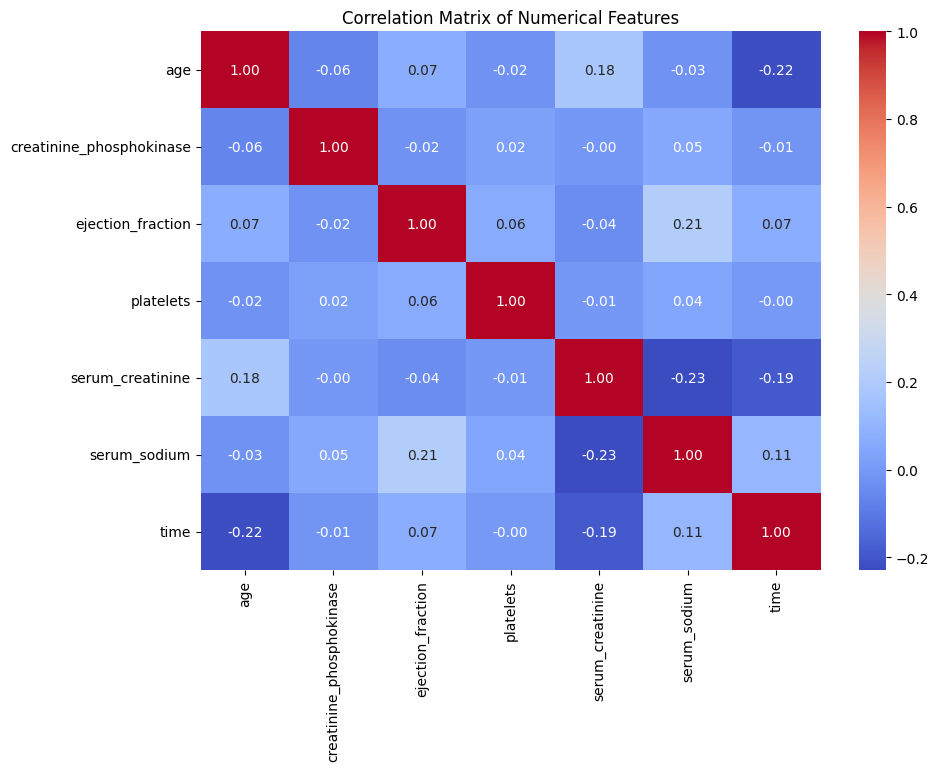

In [ ]:
# Checking correlation between numerical variables
numeric_cols=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
correlation_matrix =df[numeric_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

##### Conclusion:
Since no numerical variables have strong correlation (|r| > 0.8), multicollinearity is not a concern. Each feature provides unique information, so all can be used for modeling.

##### Checking multicolinearity using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x=df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]
x=add_constant(x)
vif_data=pd.DataFrame()
vif_data["Feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
for i in range(x.shape[1])]
print(vif_data)

                    Feature          VIF
0                     const  1053.822293
1                       age     1.087871
2  creatinine_phosphokinase     1.009290
3         ejection_fraction     1.062133
4                 platelets     1.006051
5          serum_creatinine     1.111207
6              serum_sodium     1.112764
7                      time     1.089359


##### Conclusion:
VIF (Variance Inflation Factor) was calculated for all numerical independent variables. All VIF values are close to 1, which means there is no multicollinearity among these features. So, all the variables are safe to include in the model.

##### Checking Multicolinearity for categorical variables

Cramér's V Matrix (Categorical Variable Correlation):
                     anaemia  diabetes  high_blood_pressure    sex  smoking
anaemia                1.000     0.000                0.045  0.080    0.105
diabetes               0.000     1.000                0.031  0.153    0.166
high_blood_pressure    0.045     0.031                1.000  0.088    0.021
sex                    0.080     0.153                0.088  1.000    0.434
smoking                0.105     0.166                0.021  0.434    1.000


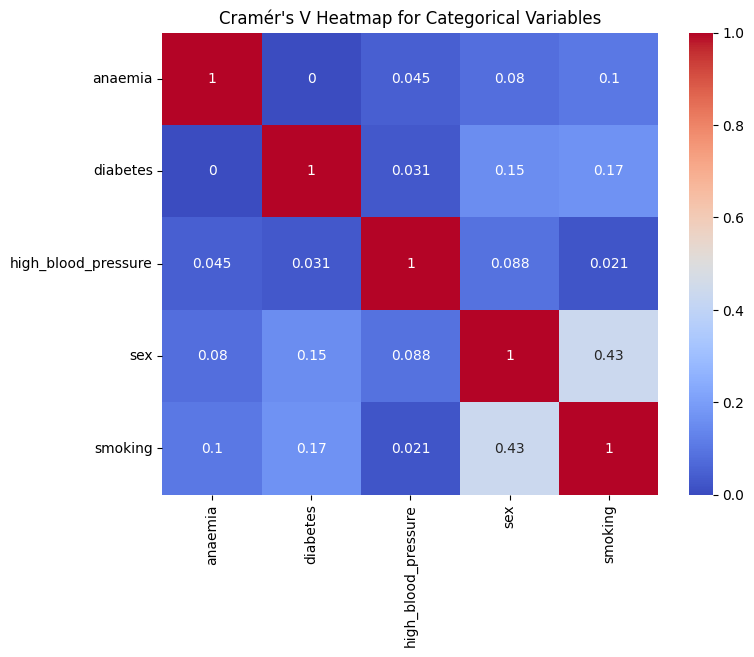

In [ ]:
# cramer's V matrix and cramer's V heatmap
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        confusion_mat = pd.crosstab(df[col1], df[col2])
        c_v = cramers_v(confusion_mat)
        cramers_matrix.loc[col1, col2] = round(c_v, 3)
cramers_matrix = cramers_matrix.astype(float)
print("Cramér's V Matrix (Categorical Variable Correlation):")
print(cramers_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.show()

## Model preperation

In [ ]:
x=df.drop("DEATH_EVENT",axis=1) # to seperate input columns
y=df["DEATH_EVENT"] # to seperate output columns
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50


In [ ]:
y.head()

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1061,70.0,0,256,0,25,0,244000.0,1.20,142,0,0,66
1704,75.0,1,582,0,30,0,225000.0,1.83,134,1,0,113
3959,45.0,0,582,0,38,1,422000.0,0.80,137,0,0,245
1763,70.0,0,81,1,35,1,533000.0,1.30,139,0,0,212
1033,75.0,1,203,1,38,1,284000.0,0.60,131,1,1,74


In [ ]:
x_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
3300,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174
4505,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30
3833,46.0,1,291,0,35,0,348000.0,0.9,140,0,0,109
4151,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180
49,53.0,0,82,1,60,0,368000.0,0.8,135,1,0,22


In [ ]:
y_train.head()

,DEATH_EVENT
1061,1
1704,1
3959,0
1763,0
1033,0


In [ ]:
y_test.head()

,DEATH_EVENT
3300,0
4505,0
3833,0
4151,1
49,0


In [ ]:
# convert into standard scale
from sklearn.preprocessing import StandardScaler
num_cols=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
scaler=StandardScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])

## Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train)

LogisticRegression(random_state=42)

#### Model Evaluation

##### Training accuracy and Confusion Matrix

In [ ]:
y_train_pred=lr_model.predict(x_train)
y_test_pred=lr_model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Training Accuracy: ",accuracy_score(y_train,y_train_pred))
print("Testing Accuracy: ",accuracy_score(y_test,y_test_pred))
print("\n Confusion Matrix: \n",confusion_matrix(y_test,y_test_pred))
print("\n Classification Report: \n",classification_report(y_test,y_test_pred))

Training Accuracy:  0.85375
Testing Accuracy:  0.829

 Confusion Matrix: 
 [[609  77]
 [ 94 220]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.79      0.80      1000
weighted avg       0.83      0.83      0.83      1000



##### ROC and AUC

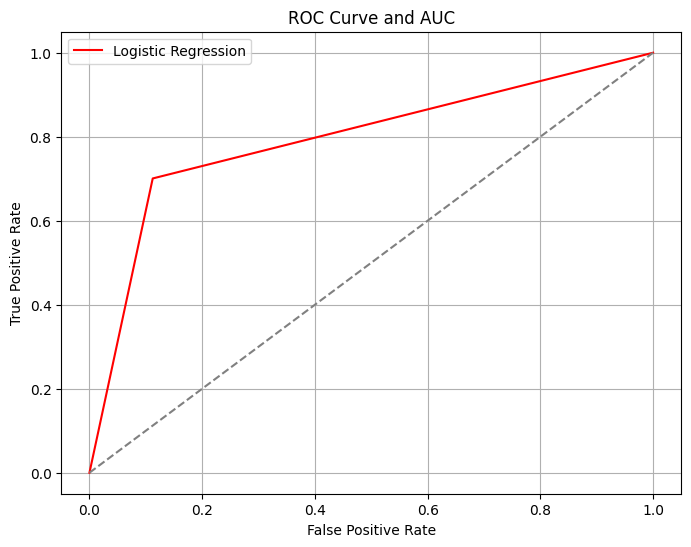

AUC Score: 0.9005728770124974


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
y_test_prob=lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="red",label="Logistic Regression")
plt.plot([0,1],[0,1],linestyle="--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve and AUC")
plt.legend()
plt.grid(True)
plt.show()
print("AUC Score:",roc_auc_score(y_test,y_test_prob))

### Logistic Regression Model Summary:
Logistic Regression Model Summary:
The logistic regression model achieved 85.38% training accuracy and 82.9% testing accuracy, showing strong generalization. It correctly identified 70% of actual death cases (recall) and had a death prediction precision of 74%, with an overall F1-score of 0.72 for the death class. The AUC score of 0.90 indicates excellent ability to distinguish between survival and death outcomes. Despite moderate class imbalance, the model performed reliably. However, recall for the minority class (death) can be further improved. Therefore, more complex models like Random Forest will be explored next to boost predictive performance.

## Random Forest Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#### Model Evaluation

Training Accuracy:  0.9995
Testing Accuracy:  0.991

Confusion Matrix: 
 [[685   1]
 [  8 306]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       686
           1       1.00      0.97      0.99       314

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



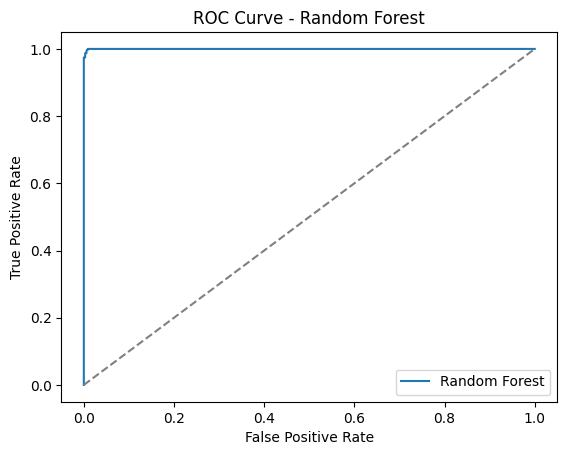

AUC Score: 0.9998769753579321


In [ ]:
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_rf))
print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred_rf))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_test_pred_rf))
print("\nClassification Report: \n", classification_report(y_test, y_test_pred_rf))
y_test_prob_rf = rf_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()
print("AUC Score:", roc_auc_score(y_test, y_test_prob_rf))

####Random Forest Model Summary:
The Random Forest classifier delivered outstanding results, with a training accuracy of 99.95% and a testing accuracy of 99.1%, showing excellent generalization. It achieved an AUC score of 0.9998, indicating near-perfect class separation. The model correctly predicted 685 out of 686 survivors and 306 out of 314 deaths. Precision, recall, and F1-score for both classes are approximately 0.99, confirming its reliability and robustness. Since both training and testing scores are close, there’s no sign of overfitting. Overall, Random Forest proves to be a powerful and dependable model for this heart failure prediction task.*italicized text*

#### Feature Importance Visualizations:

/tmp/ipython-input-33-1862268711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance, y=rf_feature_importance.index, palette='plasma')


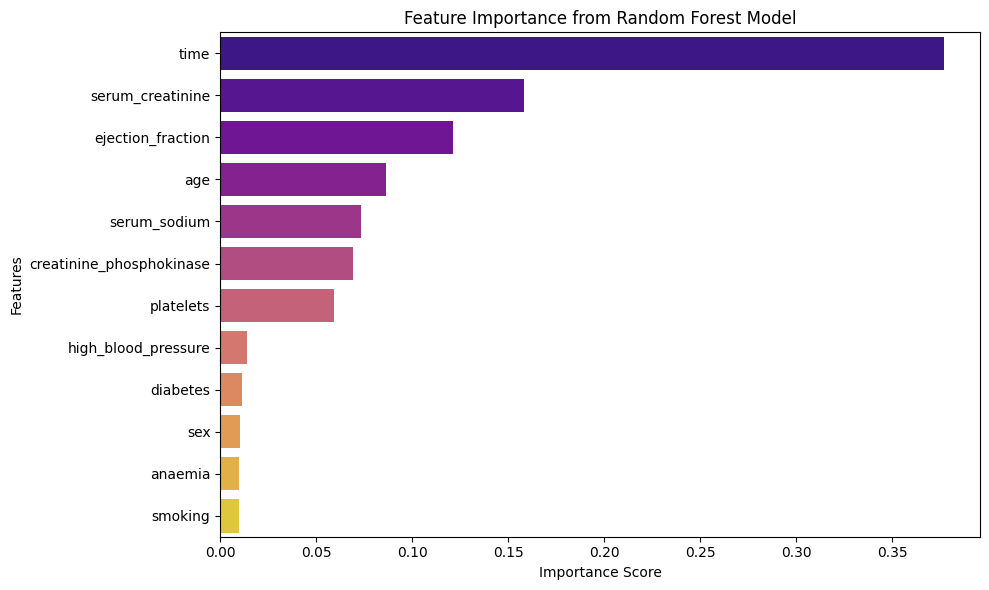

In [ ]:
rf_importances = rf_model.feature_importances_
rf_feature_importance = pd.Series(rf_importances, index=x.columns)
rf_feature_importance = rf_feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance, y=rf_feature_importance.index, palette='plasma')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Training Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
# Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

##### Model Evaluation

In [ ]:
y_pred_dt = dt_model.predict(x_test)
print("Training Accuracy: ", accuracy_score(y_train, dt_model.predict(x_train)))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Training Accuracy:  0.9995
Testing Accuracy:  0.984

Confusion Matrix:
 [[680   6]
 [ 10 304]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       686
           1       0.98      0.97      0.97       314

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



##### Decision Tree Visualizations

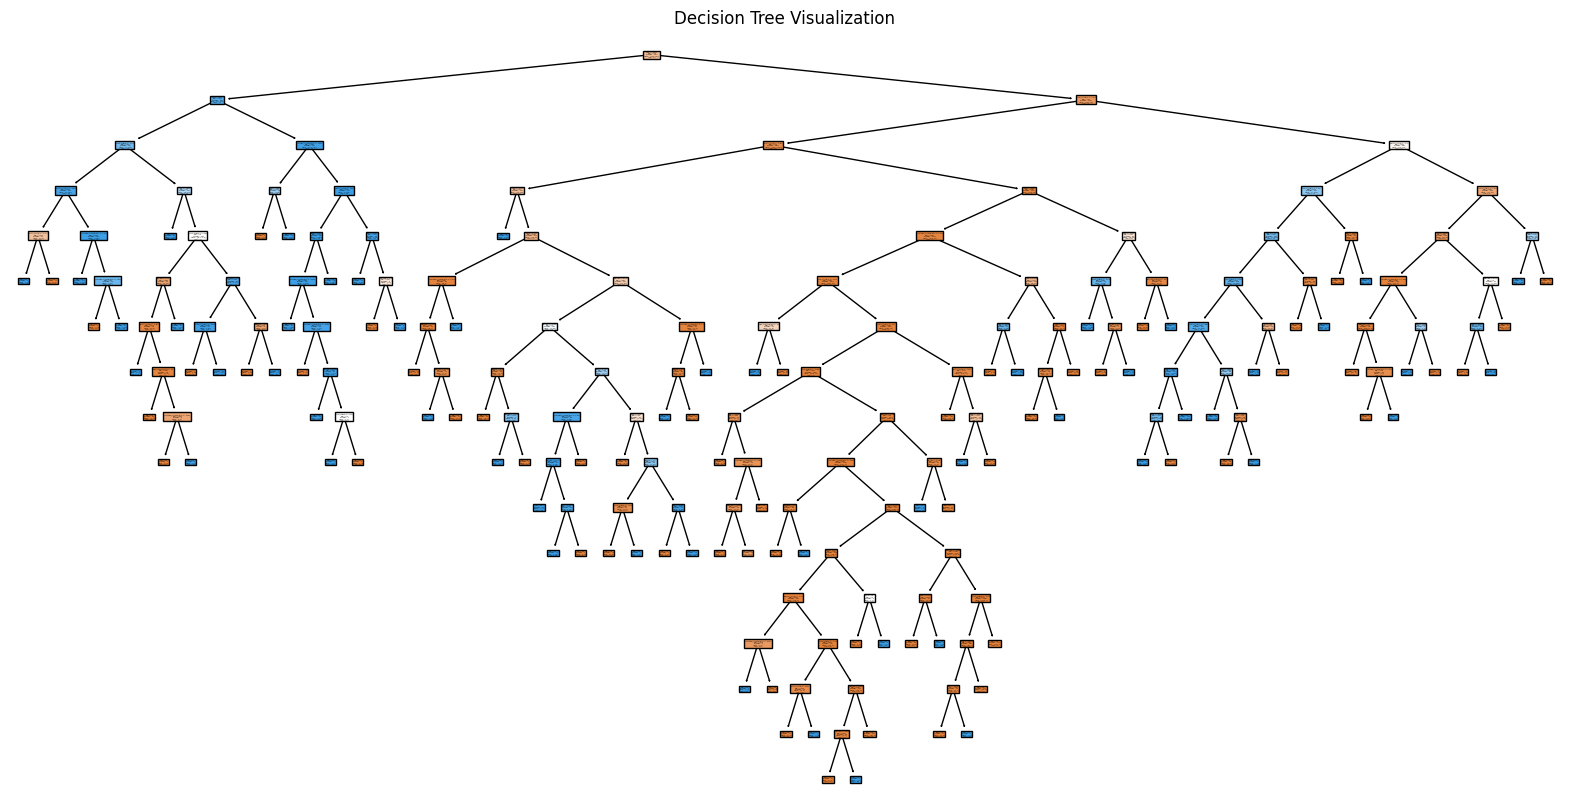

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=x.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

####Decision Tree Model Summary:
The Decision Tree classifier performed exceptionally well, with a training accuracy of 99.95% and a strong testing accuracy of 98.4%. It achieved high precision and recall for both classes (class 0 and class 1), supported by F1-scores of 99% and 97% respectively. The confusion matrix confirms reliable classification with minimal misclassifications. However, the large gap between perfect training accuracy and slightly lower test accuracy hints at mild overfitting. Despite that, the model remains highly effective and interpretable, making it a valuable baseline for comparison in this heart failure survival prediction task.

##### Feature Importance Visualizations:

/tmp/ipython-input-37-3901999025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


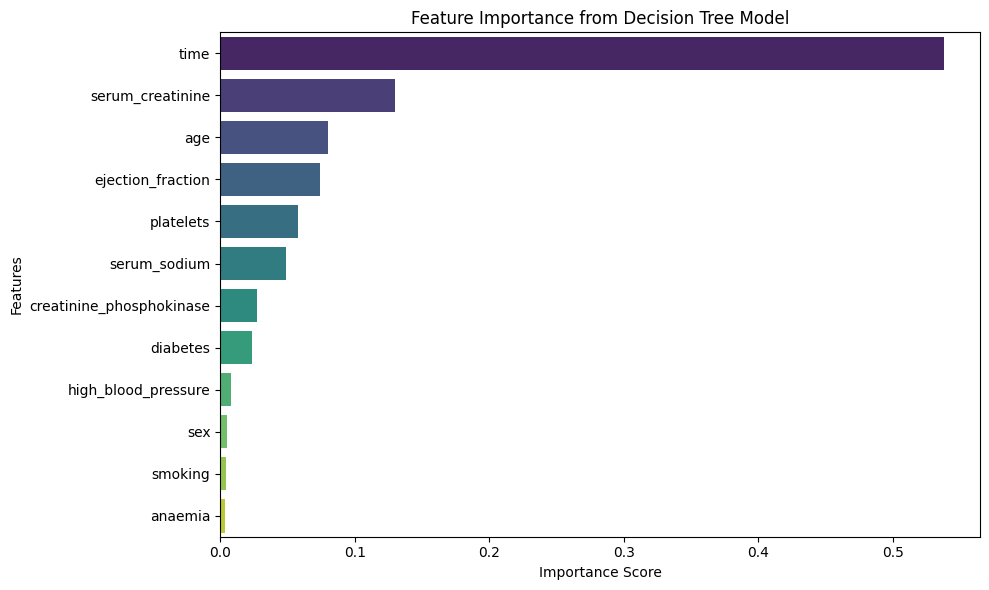

In [ ]:
importances = dt_model.feature_importances_
feature_importance = pd.Series(importances, index=x.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance from Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Comparision Table


| Model            | Accuracy | Precision | Recall | F1-Score | AUC   |
|------------------|----------|-----------|--------|----------|-------|
| LogisticRegression | 82.9%    | 0.74      | 0.70   | 0.72     | 0.90  |
| Random Forest     | 99.1%    | 0.99      | 0.97   | 0.98     | 0.9998|
| Decision Tree     | 98.4%    | 0.98      | 0.97   | 0.97     | 0.98  |